In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data visualization

#### EURUSD

In [10]:
data = pd.read_csv("FX_EURUSD30.csv")

# Group data by increments of 0.005
bins = pd.cut(data['close'], bins=pd.interval_range(start=data['close'].min(), end=data['close'].max(), freq=0.0005))
bins

0        (1.1368999999999798, 1.1373999999999798]
1        (1.1368999999999798, 1.1373999999999798]
2        (1.1368999999999798, 1.1373999999999798]
3        (1.1368999999999798, 1.1373999999999798]
4        (1.1363999999999799, 1.1368999999999798]
                           ...                   
23988    (1.0868999999999853, 1.0873999999999853]
23989    (1.0878999999999852, 1.0883999999999852]
23990    (1.0878999999999852, 1.0883999999999852]
23991     (1.0883999999999852, 1.088899999999985]
23992     (1.0883999999999852, 1.088899999999985]
Name: close, Length: 23993, dtype: category
Categories (390, interval[float64, right]): [(0.9539, 0.9543999999999999] < (0.9543999999999999, 0.9548999999999999] < (0.9548999999999999, 0.9553999999999998] < (0.9553999999999998, 0.9558999999999997] ... (1.1468999999999787, 1.1473999999999787] < (1.1473999999999787, 1.1478999999999786] < (1.1478999999999786, 1.1483999999999785] < (1.1483999999999785, 1.1488999999999785]]

close
(0.9539, 0.9543999999999999]                 1
(0.9543999999999999, 0.9548999999999999]     2
(0.9548999999999999, 0.9553999999999998]     5
(0.9553999999999998, 0.9558999999999997]     4
(0.9558999999999997, 0.9563999999999997]     3
                                            ..
(1.1463999999999788, 1.1468999999999787]    22
(1.1468999999999787, 1.1473999999999787]    13
(1.1473999999999787, 1.1478999999999786]     6
(1.1478999999999786, 1.1483999999999785]     0
(1.1483999999999785, 1.1488999999999785]     1
Name: close, Length: 390, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.indexes.category.CategoricalIndex'>
CategoricalIndex([            (0.9539, 0.9543999999999999],
                  (0.9543999999999999, 0.9548999999999999],
                  (0.9548999999999999, 0.9553999999999998],
                  (0.9553999999999998, 0.9558999999999997],
                  (0.9558999999999997, 0.9563999999999997],
                  (0.9563999999999997, 0.956

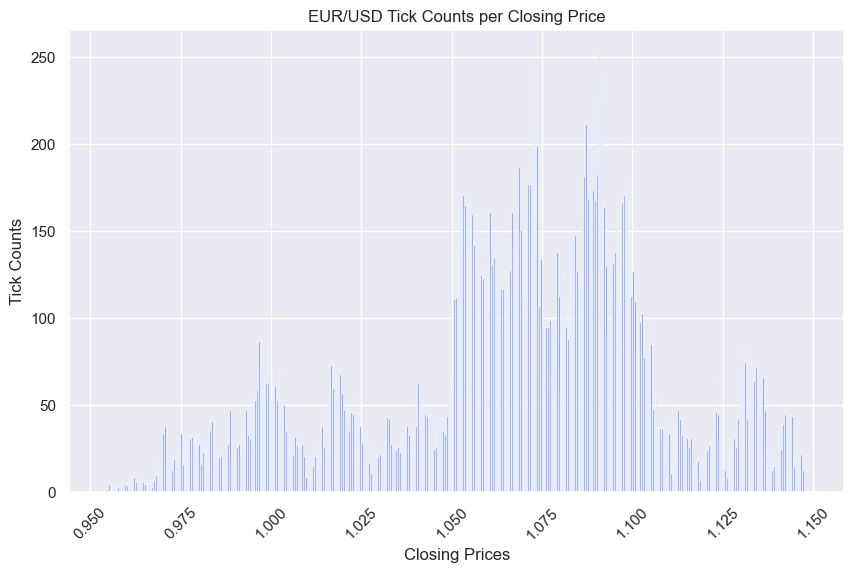

In [15]:

tick_counts = data.groupby(bins)['close'].count()
print(tick_counts)
print(type(data))
print(type(tick_counts.index))
print(tick_counts.index)
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Get the mid-point of each interval for plotting
mid_points = [interval.mid for interval in tick_counts.index.categories]

# plt.scatter(mid_points, tick_counts.values, alpha=0.5, color='#6082B6', s=8)
plt.bar(mid_points, tick_counts.values, width=0.0004, alpha=0.7, color='#4169E1')

plt.xlabel('Closing Prices')
plt.ylabel('Tick Counts')
plt.title('EUR/USD Tick Counts per Closing Price')
plt.xticks(rotation=45)  # Rotate x-labels for better visibility
plt.show()




#### GBPUSD

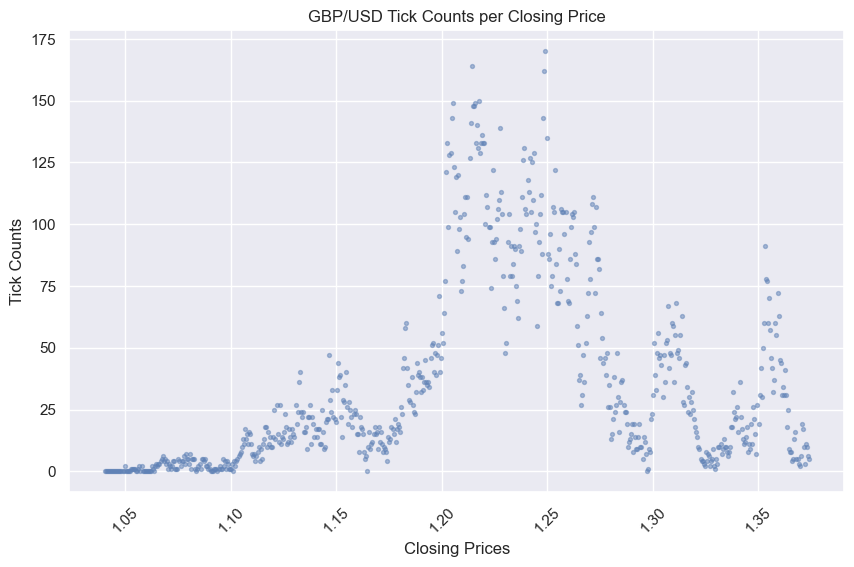

In [4]:
data = pd.read_csv("FX_GBPUSD, 30.csv")

# Group data by increments of 0.005
bins = pd.cut(data['close'], bins=pd.interval_range(start=data['close'].min(), end=data['close'].max(), freq=0.0005))
tick_counts = data.groupby(bins)['close'].count()

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Get the mid-point of each interval for plotting
mid_points = [interval.mid for interval in tick_counts.index.categories]

plt.scatter(mid_points, tick_counts.values, alpha=0.5, color='#6082B6', s=8)
plt.xlabel('Closing Prices')
plt.ylabel('Tick Counts')
plt.title('GBP/USD Tick Counts per Closing Price')
plt.xticks(rotation=45)  # Rotate x-labels for better visibility
plt.show()


#### USDCAD

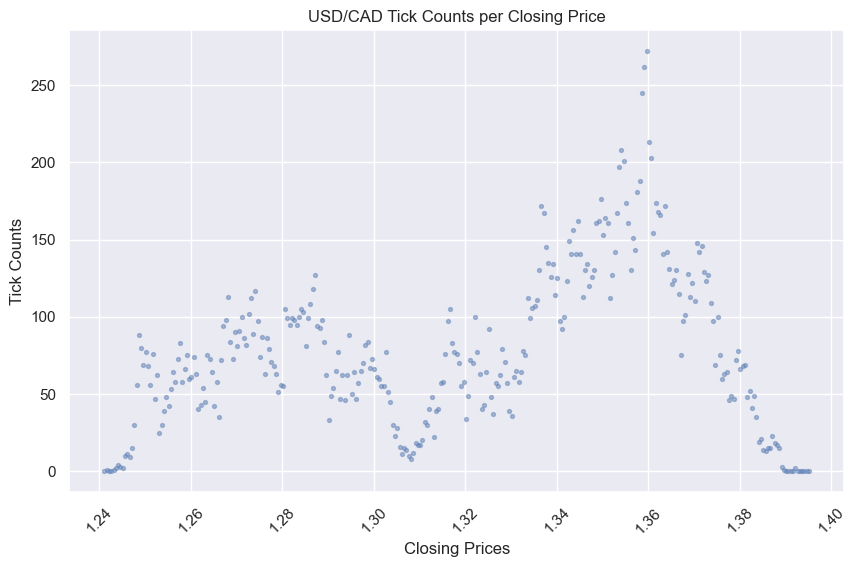

In [5]:
data = pd.read_csv("FX_USDCAD, 30.csv")

# Group data by increments of 0.005
bins = pd.cut(data['close'], bins=pd.interval_range(start=data['close'].min(), end=data['close'].max(), freq=0.0005))
tick_counts = data.groupby(bins)['close'].count()

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Get the mid-point of each interval for plotting
mid_points = [interval.mid for interval in tick_counts.index.categories]

plt.scatter(mid_points, tick_counts.values, alpha=0.5, color='#6082B6', s=8)
plt.xlabel('Closing Prices')
plt.ylabel('Tick Counts')
plt.title('USD/CAD Tick Counts per Closing Price')
plt.xticks(rotation=45)  # Rotate x-labels for better visibility
plt.show()


#### USDCHF

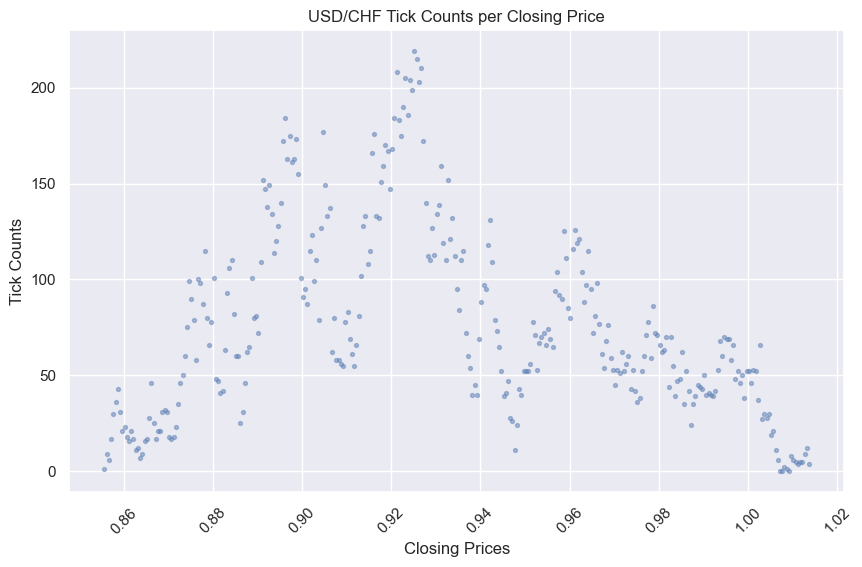

In [6]:
data = pd.read_csv("FX_USDCHF, 30.csv")

# Group data by increments of 0.005
bins = pd.cut(data['close'], bins=pd.interval_range(start=data['close'].min(), end=data['close'].max(), freq=0.0005))
tick_counts = data.groupby(bins)['close'].count()

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Get the mid-point of each interval for plotting
mid_points = [interval.mid for interval in tick_counts.index.categories]

plt.scatter(mid_points, tick_counts.values, alpha=0.5, color='#6082B6', s=8)
plt.xlabel('Closing Prices')
plt.ylabel('Tick Counts')
plt.title('USD/CHF Tick Counts per Closing Price')
plt.xticks(rotation=45)  # Rotate x-labels for better visibility
plt.show()


#### AUDUSD

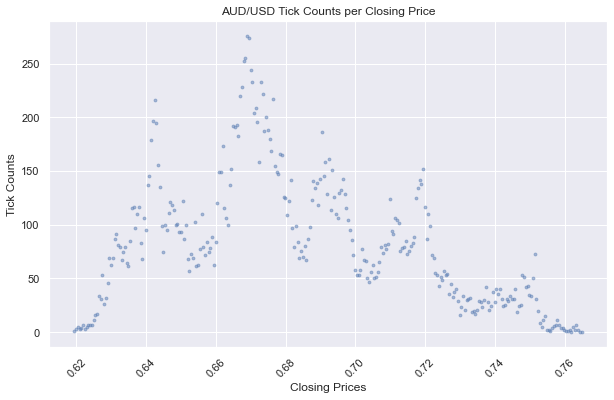

In [85]:
data = pd.read_csv("FX_AUDUSD, 30.csv")

# Group data by increments of 0.005
bins = pd.cut(data['close'], bins=pd.interval_range(start=data['close'].min(), end=data['close'].max(), freq=0.0005))
tick_counts = data.groupby(bins)['close'].count()

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Get the mid-point of each interval for plotting
mid_points = [interval.mid for interval in tick_counts.index.categories]

plt.scatter(mid_points, tick_counts.values, alpha=0.5, color='#6082B6', s=8)
plt.xlabel('Closing Prices')
plt.ylabel('Tick Counts')
plt.title('AUD/USD Tick Counts per Closing Price')
plt.xticks(rotation=45)  # Rotate x-labels for better visibility
plt.show()


#### NZDUSD

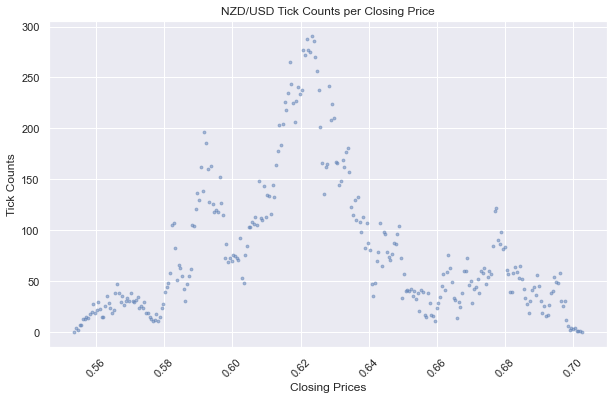

In [86]:
data = pd.read_csv("FX_NZDUSD, 30.csv")

# Group data by increments of 0.005
bins = pd.cut(data['close'], bins=pd.interval_range(start=data['close'].min(), end=data['close'].max(), freq=0.0005))
tick_counts = data.groupby(bins)['close'].count()

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Get the mid-point of each interval for plotting
mid_points = [interval.mid for interval in tick_counts.index.categories]

plt.scatter(mid_points, tick_counts.values, alpha=0.5, color='#6082B6', s=8)
plt.xlabel('Closing Prices')
plt.ylabel('Tick Counts')
plt.title('NZD/USD Tick Counts per Closing Price')
plt.xticks(rotation=45)  # Rotate x-labels for better visibility
plt.show()


## Cluster Statistics

Before applying clustering models to our dataset, we must determine the optimal number of clusters. To achieve this, we employ a set of statistical metrics, each offering distinct insights:

1. **Silhouette Score**: The Silhouette Score measures the similarity of data points within clusters compared to neighboring clusters, yielding a range from -1 to 1. Higher values indicate more distinct clusters. Mathematically, it is defined as:

    $$
    S(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}
    $$
    
    where \( S(i) \) is the Silhouette Score for data point \( i \), \( a(i) \) is the average distance of \( i \) to other points in the same cluster, and \( b(i) \) is the smallest average distance from \( i \) to points in a different cluster.

2. **Calinski-Harabasz Score (Variance Ratio Criterion)**: The Calinski-Harabasz Score assesses the ratio of between-cluster variance to within-cluster variance. A higher score indicates more distinct clustering. Mathematically, it is expressed as:

    $$
    CH = \frac{B(K)}{W(K)} \times \frac{N - K}{K - 1}
    $$

    where \( CH \) is the Calinski-Harabasz Score, \( B(K) \) is the between-cluster dispersion, \( W(K) \) is the within-cluster dispersion, \( N \) is the total number of data points, and \( K \) is the number of clusters.

3. **Davies-Bouldin Score**: The Davies-Bouldin Score quantifies the average similarity between each cluster and its most similar cluster. A lower score indicates more cohesive clusters. It is computed as:

    $$
    DB = \frac{1}{K} \sum_{i=1}^{K} \max_{j \neq i} \left(\frac{S_i + S_j}{D_{ij}}\right)
    $$

    where \( DB \) is the Davies-Bouldin Score, \( K \) is the number of clusters, \( S_i \) and \( S_j \) are the average distances from cluster \( i \) and \( j \) to their respective centroids, and \( D_{ij} \) is the distance between centroids of clusters \( i \) and \( j \).

4. **Elbow Method**: The Elbow Method is a heuristic that identifies the "elbow point" in the sum of squared distances between data points and their cluster centers (inertia). The optimal number of clusters corresponds to the point where the rate of inertia reduction sharply changes.


#### EURUSD

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


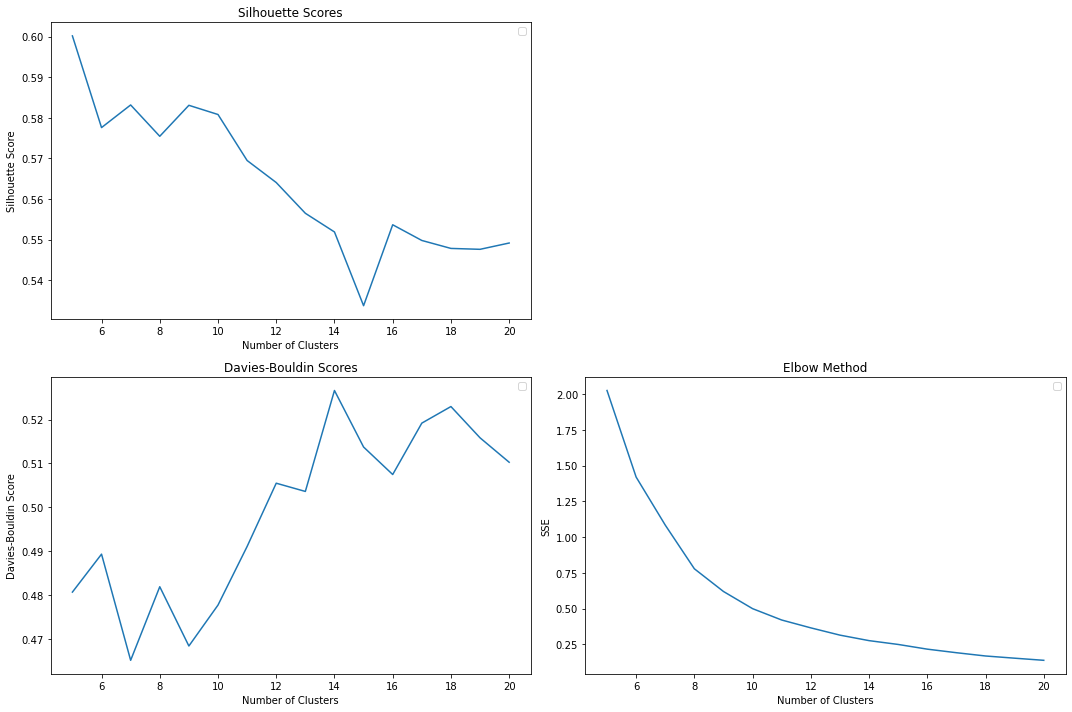

In [6]:
max_clusters = 20
silhouette_scores = []
ch_scores = []
db_scores = []
sse = []  # For Elbow Method

data = pd.read_csv("FX_EURUSD30.csv")['close'].values.reshape(-1, 1)

for k in range(5, max_clusters + 1):
    kmeans = KMeans(n_clusters=k).fit(data)
    labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_scores.append(silhouette_score(data, labels))

    # Davies-Bouldin Score
    db_scores.append(davies_bouldin_score(data, labels))

    # SSE for Elbow Method
    sse.append(kmeans.inertia_)

# Plotting the metrics
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(range(5, max_clusters + 1), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()




plt.subplot(2, 2, 3)
plt.plot(range(5, max_clusters + 1), db_scores)
plt.title('Davies-Bouldin Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(5, max_clusters + 1), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.legend()

plt.tight_layout()
plt.show()


#### GBPUSD

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


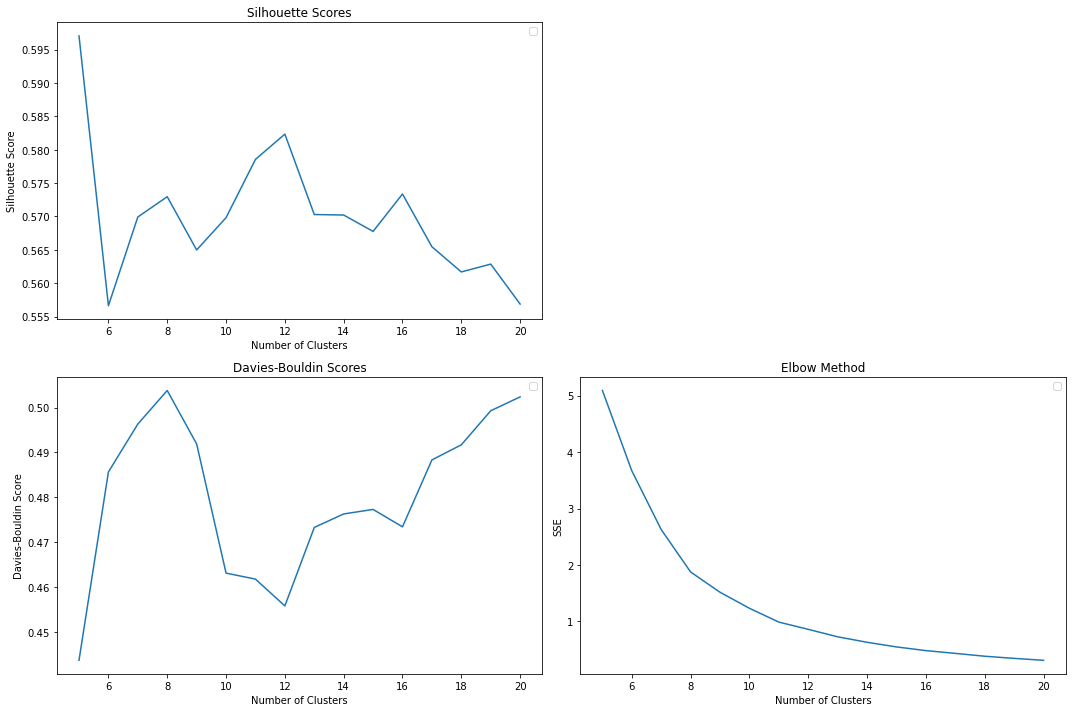

In [7]:
max_clusters = 20
silhouette_scores = []
ch_scores = []
db_scores = []
sse = []  # For Elbow Method

data = pd.read_csv("FX_GBPUSD, 30.csv")['close'].values.reshape(-1, 1)

for k in range(5, max_clusters + 1):
    kmeans = KMeans(n_clusters=k).fit(data)
    labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_scores.append(silhouette_score(data, labels))

    # Davies-Bouldin Score
    db_scores.append(davies_bouldin_score(data, labels))

    # SSE for Elbow Method
    sse.append(kmeans.inertia_)

# Plotting the metrics
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(range(5, max_clusters + 1), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()




plt.subplot(2, 2, 3)
plt.plot(range(5, max_clusters + 1), db_scores)
plt.title('Davies-Bouldin Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(5, max_clusters + 1), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.legend()

plt.tight_layout()
plt.show()


#### USDCAD

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


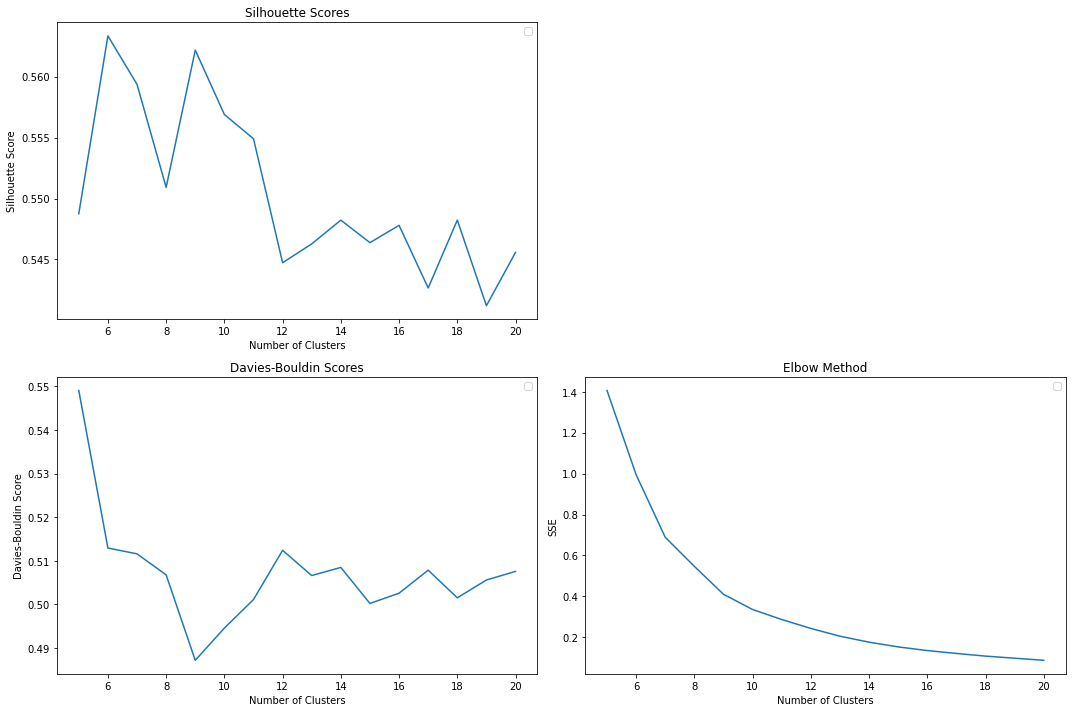

In [8]:
max_clusters = 20
silhouette_scores = []
ch_scores = []
db_scores = []
sse = []  # For Elbow Method

data = pd.read_csv("FX_USDCAD, 30.csv")['close'].values.reshape(-1, 1)

for k in range(5, max_clusters + 1):
    kmeans = KMeans(n_clusters=k).fit(data)
    labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_scores.append(silhouette_score(data, labels))

    # Davies-Bouldin Score
    db_scores.append(davies_bouldin_score(data, labels))

    # SSE for Elbow Method
    sse.append(kmeans.inertia_)

# Plotting the metrics
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(range(5, max_clusters + 1), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()




plt.subplot(2, 2, 3)
plt.plot(range(5, max_clusters + 1), db_scores)
plt.title('Davies-Bouldin Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(5, max_clusters + 1), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.legend()

plt.tight_layout()
plt.show()


#### USDCHF

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


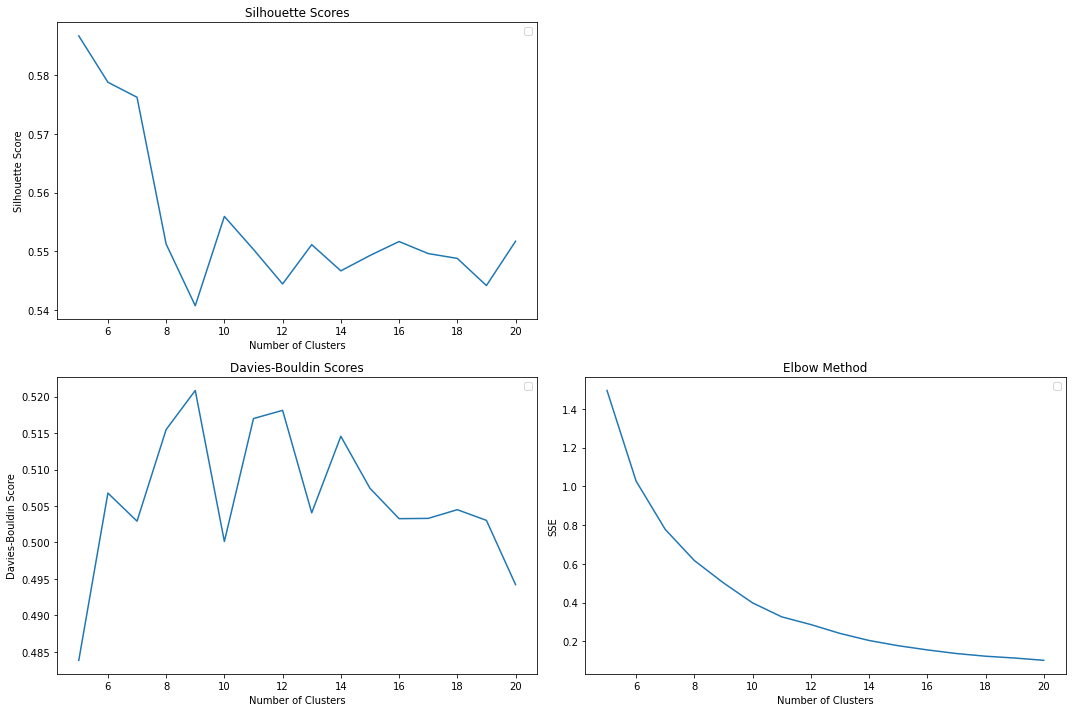

In [9]:
max_clusters = 20
silhouette_scores = []
ch_scores = []
db_scores = []
sse = []  # For Elbow Method

data = pd.read_csv("FX_USDCHF, 30.csv")['close'].values.reshape(-1, 1)

for k in range(5, max_clusters + 1):
    kmeans = KMeans(n_clusters=k).fit(data)
    labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_scores.append(silhouette_score(data, labels))

    # Davies-Bouldin Score
    db_scores.append(davies_bouldin_score(data, labels))

    # SSE for Elbow Method
    sse.append(kmeans.inertia_)

# Plotting the metrics
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(range(5, max_clusters + 1), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()




plt.subplot(2, 2, 3)
plt.plot(range(5, max_clusters + 1), db_scores)
plt.title('Davies-Bouldin Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(5, max_clusters + 1), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.legend()

plt.tight_layout()
plt.show()


#### AUDUSD

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


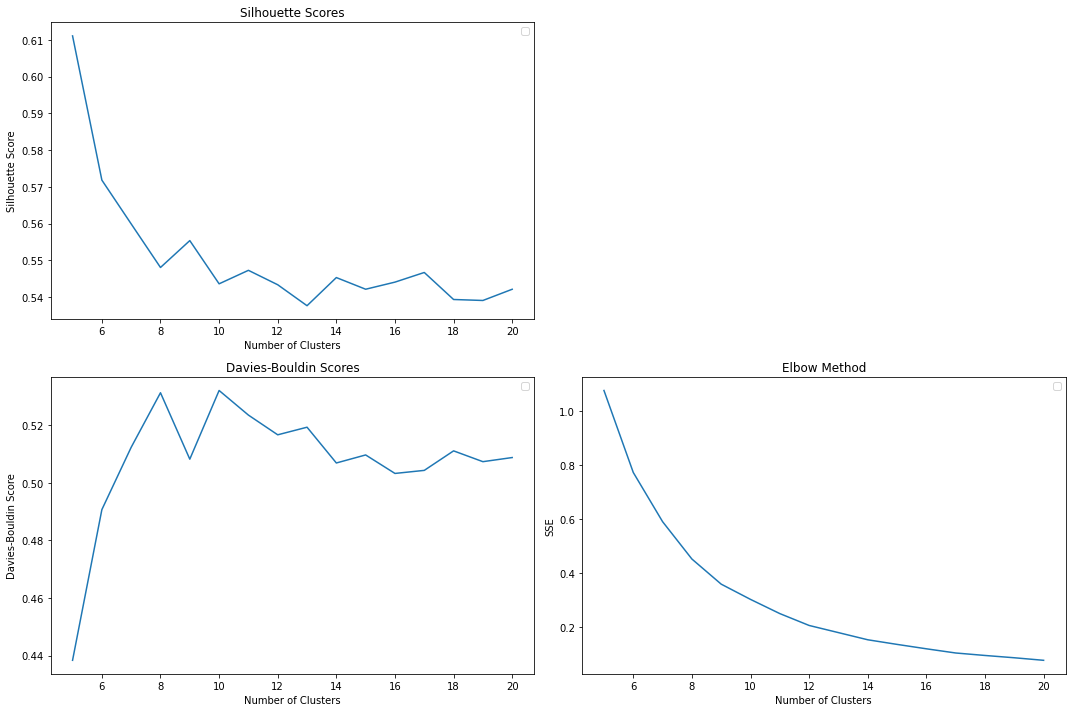

In [11]:
max_clusters = 20
silhouette_scores = []
ch_scores = []
db_scores = []
sse = []  # For Elbow Method

data = pd.read_csv("FX_AUDUSD, 30.csv")['close'].values.reshape(-1, 1)

for k in range(5, max_clusters + 1):
    kmeans = KMeans(n_clusters=k).fit(data)
    labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_scores.append(silhouette_score(data, labels))

    # Davies-Bouldin Score
    db_scores.append(davies_bouldin_score(data, labels))

    # SSE for Elbow Method
    sse.append(kmeans.inertia_)

# Plotting the metrics
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(range(5, max_clusters + 1), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()




plt.subplot(2, 2, 3)
plt.plot(range(5, max_clusters + 1), db_scores)
plt.title('Davies-Bouldin Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(5, max_clusters + 1), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.legend()

plt.tight_layout()
plt.show()


#### NZDUSD

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


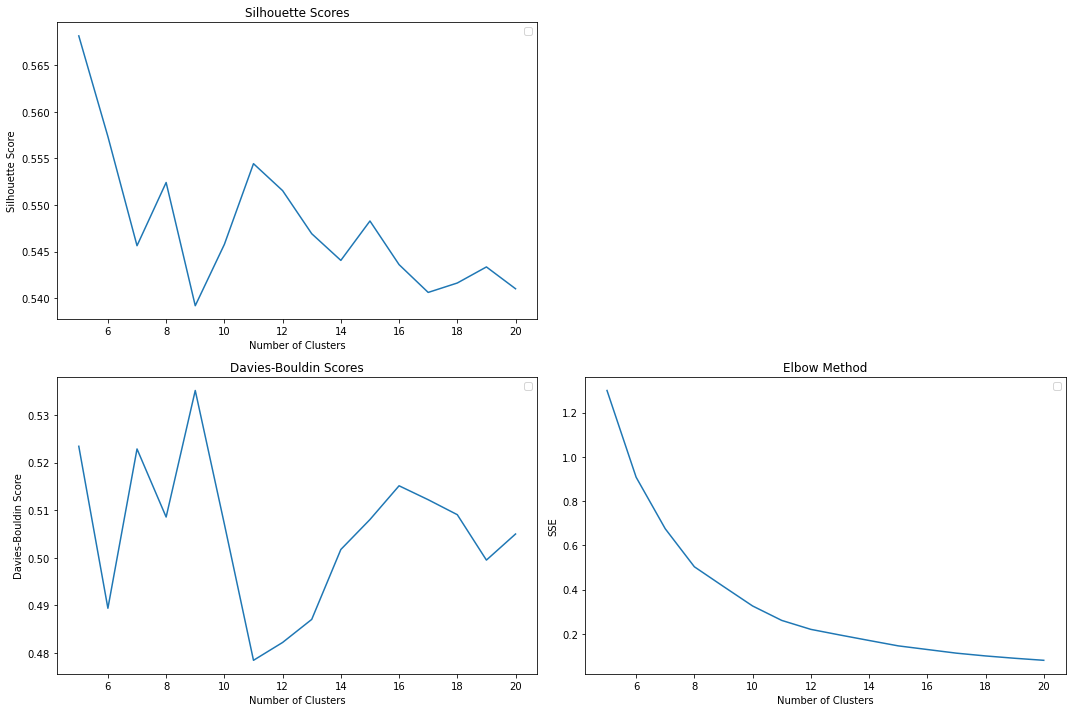

In [4]:
max_clusters = 20
silhouette_scores = []
ch_scores = []
db_scores = []
sse = []  # For Elbow Method

data = pd.read_csv("FX_NZDUSD, 30.csv")['close'].values.reshape(-1, 1)

for k in range(5, max_clusters + 1):
    kmeans = KMeans(n_clusters=k).fit(data)
    labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_scores.append(silhouette_score(data, labels))

    # Davies-Bouldin Score
    db_scores.append(davies_bouldin_score(data, labels))

    # SSE for Elbow Method
    sse.append(kmeans.inertia_)

# Plotting the metrics
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(range(5, max_clusters + 1), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()




plt.subplot(2, 2, 3)
plt.plot(range(5, max_clusters + 1), db_scores)
plt.title('Davies-Bouldin Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(5, max_clusters + 1), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.legend()

plt.tight_layout()
plt.show()


The selection of an optimal number of clusters for currency currency data is a nuanced process, influenced by the trading frequency, transaction size, and risk-return preferences of a traders strategy. Our approach seeks a balance between the statistical precision of our optimal cluster metrics and the practical relevance in trading scenarios.

For our analysis, varying cluster counts have been determined for different currency pairs, based on an evaluation of their unique market characteristics and statistical metrics. We have assigned 8 clusters each for EUR/USD and GBP/USD, 9 clusters for USD/CAD, AUD/USD, and NZD/USD, and 10 clusters for USD/CHF, reflecting the distinct trading patterns and volatility profiles of these currencies.

## Implementation

#### K-Means Clustering (EURUSD)

Model Hit Rate: 0.09336455531855699
Wiener Process Hit Rate: 0.051887229898914956
t-statistic: 1.0230077811337819
p-value: 0.34576751962881486


Model Reversal Rate: 0.0006491699897987573
Wiener Process Reversal Rate: 0.0
Reversal t-statistic: 2.3777817717036513
Reversal p-value: 0.05493414128148982


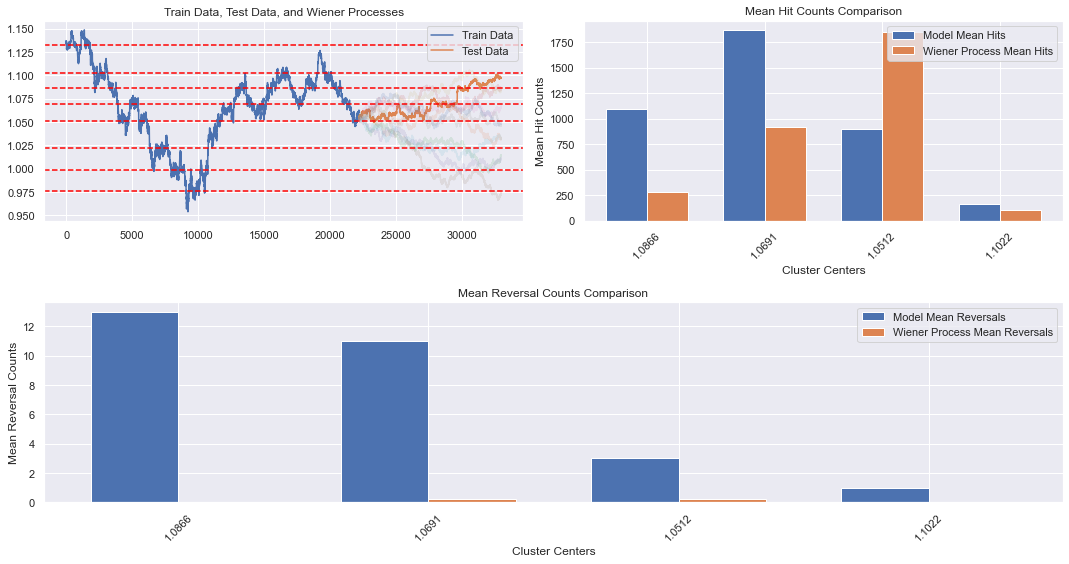

In [23]:
def kmeans(data30m, data5m, clusters):
    def calculate_reversals(prices, centers, look_forward=4, reversal_threshold=0.002):
        reversals = {center: 0 for center in centers}
        for i in range(len(prices)):
            for center in centers:
                if abs(prices[i] - center) / center <= margin_of_error:
                    for j in range(i+1, min(i+1+look_forward, len(prices))):
                        if abs(prices[j] - prices[i]) / prices[i] >= reversal_threshold:
                            reversals[center] += 1
                            break
        return reversals

    # Load data
    prices = data_30m['close'].values.reshape(-1, 1)
    train_prices, test_prices_30m = train_test_split(prices, test_size=0.075, shuffle=False)
    test_prices = data_5m[data_5m['time'] >= 1696867200]['close'].values

    # Applying K-means clustering
    kmeans = KMeans(n_clusters=clusters, random_state=0)
    kmeans.fit(data_30m[data_30m['time'] < 1696867200][['close', 'open', 'high', 'low']].values)

    # Extract the cluster centers
    centers = kmeans.cluster_centers_[:, 0]  # Assuming you want to use the 'close' price as the center

    # Define margin of error
    margin_of_error = 0.003  # ±0.3%

    # Calculate hits on the test set
    hits = {center: 0 for center in centers}
    for price in test_prices:
        for center in centers:
            if abs(price - center) / center <= margin_of_error:
                hits[center] += 1

    num_simulations = 100
    total_hits_model, total_reversals_model = np.zeros(len(centers)), np.zeros(len(centers))
    total_hits_wiener, total_reversals_wiener = np.zeros(len(centers)), np.zeros(len(centers))

    for seed in range(num_simulations):
        np.random.seed(seed)

        # Re-simulate Wiener process
        wiener_process = np.empty_like(test_prices)
        wiener_process[0] = test_prices[0]
        for i in range(1, len(test_prices)):
            wiener_process[i] = wiener_process[i - 1] + np.random.normal(0, np.std(train_prices) / np.sqrt(len(train_prices)))

        # Calculate hits and reversals for actual data
        hits = {center: 0 for center in centers}
        actual_reversals = calculate_reversals(test_prices, centers)
        for price in test_prices:
            for center in centers:
                if abs(price - center) / center <= margin_of_error:
                    hits[center] += 1

        # Calculate hits and reversals for Wiener process
        wiener_hits = {center: 0 for center in centers}
        wiener_reversals = calculate_reversals(wiener_process, centers)
        for price in wiener_process:
            for center in centers:
                if abs(price - center) / center <= margin_of_error:
                    wiener_hits[center] += 1

        # Accumulate hits and reversals
        for i, center in enumerate(centers):
            total_hits_model[i] += hits[center]
            total_reversals_model[i] += actual_reversals[center]
            total_hits_wiener[i] += wiener_hits[center]
            total_reversals_wiener[i] += wiener_reversals[center]

    # Calculate mean hit and reversal rates, excluding levels with zero hits or reversals
    mean_hits_model = total_hits_model / num_simulations
    mean_reversals_model = total_reversals_model / num_simulations
    mean_hits_wiener = total_hits_wiener / num_simulations
    mean_reversals_wiener = total_reversals_wiener / num_simulations

    # Exclude levels with zero total hits or total reversals from mean values
    non_zero_indices_hits = np.where(mean_hits_model != 0)[0]
    non_zero_indices_reversals = np.where(mean_reversals_model != 0)[0]

    # Extract non-zero centers
    non_zero_centers_hits = [centers[i] for i in non_zero_indices_hits]
    non_zero_centers_reversals = [centers[i] for i in non_zero_indices_reversals]

    # Plotting with mean hit and reversal rates (excluding zero values)
    plt.figure(figsize=(15, 8))

    # Plot train data, test data, and the first 10 Wiener processes
    plt.subplot(2, 2, 1)
    plt.plot(range(len(train_prices)), train_prices, label='Train Data')
    plt.plot(range(len(train_prices), len(train_prices) + len(test_prices)), test_prices, label='Test Data')
    for seed in range(10):
        np.random.seed(seed)
        wiener_temp = np.empty_like(test_prices)
        wiener_temp[0] = test_prices[0]
        for i in range(1, len(test_prices)):
            wiener_temp[i] = wiener_temp[i - 1] + np.random.normal(0, np.std(train_prices) / np.sqrt(len(train_prices)))
        plt.plot(range(len(train_prices), len(train_prices) + len(wiener_temp)), wiener_temp, alpha=0.15)
    for level in centers:
        plt.axhline(y=level, color='red', linestyle='--')
    plt.title('Train Data, Test Data, and Wiener Processes')
    plt.legend()

    # Plot for mean hit counts comparison (excluding zero values)
    plt.subplot(2, 2, 2)
    width = 0.35
    indices_hits = np.arange(len(non_zero_centers_hits))
    plt.bar(indices_hits - width/2, mean_hits_model[non_zero_indices_hits], width, label='Model Mean Hits')
    plt.bar(indices_hits + width/2, mean_hits_wiener[non_zero_indices_hits], width, label='Wiener Process Mean Hits')
    plt.xlabel('Cluster Centers')
    plt.ylabel('Mean Hit Counts')
    plt.title('Mean Hit Counts Comparison')
    plt.xticks(indices_hits, [f'{center:.4f}' for center in non_zero_centers_hits], rotation=45)
    plt.legend()

    # Plot for mean reversal counts comparison (excluding zero values)
    plt.subplot(2, 1, 2)
    indices_reversals = np.arange(len(non_zero_centers_reversals))
    plt.bar(indices_reversals - width/2, mean_reversals_model[non_zero_indices_reversals], width, label='Model Mean Reversals')
    plt.bar(indices_reversals + width/2, mean_reversals_wiener[non_zero_indices_reversals], width, label='Wiener Process Mean Reversals')
    plt.xlabel('Cluster Centers')
    plt.ylabel('Mean Reversal Counts')
    plt.title('Mean Reversal Counts Comparison')
    plt.xticks(indices_reversals, [f'{center:.4f}' for center in non_zero_centers_reversals], rotation=45)
    plt.legend()

    # Statistical comparison for hit rate (excluding zero values)
    non_zero_hits_model = np.array(list(hits.values()))[non_zero_indices_hits]
    non_zero_wiener_hits = np.array(list(wiener_hits.values()))[non_zero_indices_hits]
    t_stat, p_value = stats.ttest_ind(non_zero_hits_model, non_zero_wiener_hits)
    print("Model Hit Rate:", sum(non_zero_hits_model) / (len(test_prices) * len(non_zero_centers_hits)))
    print("Wiener Process Hit Rate:", sum(non_zero_wiener_hits) / (len(wiener_process) * len(non_zero_centers_hits)))
    print("t-statistic:", t_stat)
    print("p-value:", p_value)

    # Statistical comparison for reversal rate (excluding zero values)
    non_zero_actual_reversals = np.array(list(actual_reversals.values()))[non_zero_indices_reversals]
    non_zero_wiener_reversals = np.array(list(wiener_reversals.values()))[non_zero_indices_reversals]
    t_stat_reversals, p_value_reversals = stats.ttest_ind(non_zero_actual_reversals, non_zero_wiener_reversals)
    print("\n\nModel Reversal Rate:", sum(non_zero_actual_reversals) / (len(test_prices) * len(non_zero_centers_reversals)))
    print("Wiener Process Reversal Rate:", sum(non_zero_wiener_reversals) / (len(wiener_process) * len(non_zero_centers_reversals)))
    print("Reversal t-statistic:", t_stat_reversals)
    print("Reversal p-value:", p_value_reversals)

    plt.tight_layout()
    plt.show()
    
    
data_30m = pd.read_csv("FX_EURUSD30.csv")  
data_5m = pd.read_csv("FX_EURUSD5.csv")
kmeans(data30m=data_30m, data5m=data_5m, clusters=8)



#### K-Means Clustering (GBPUSD)

Model Hit Rate: 0.09358529373955521
Wiener Process Hit Rate: 0.0341174958220851
t-statistic: 1.407776285586184
p-value: 0.2319583050616764


Model Reversal Rate: 0.0009255688391824142
Wiener Process Reversal Rate: 2.571024553284484e-05
Reversal t-statistic: 2.20043114711676
Reversal p-value: 0.09260814665135655


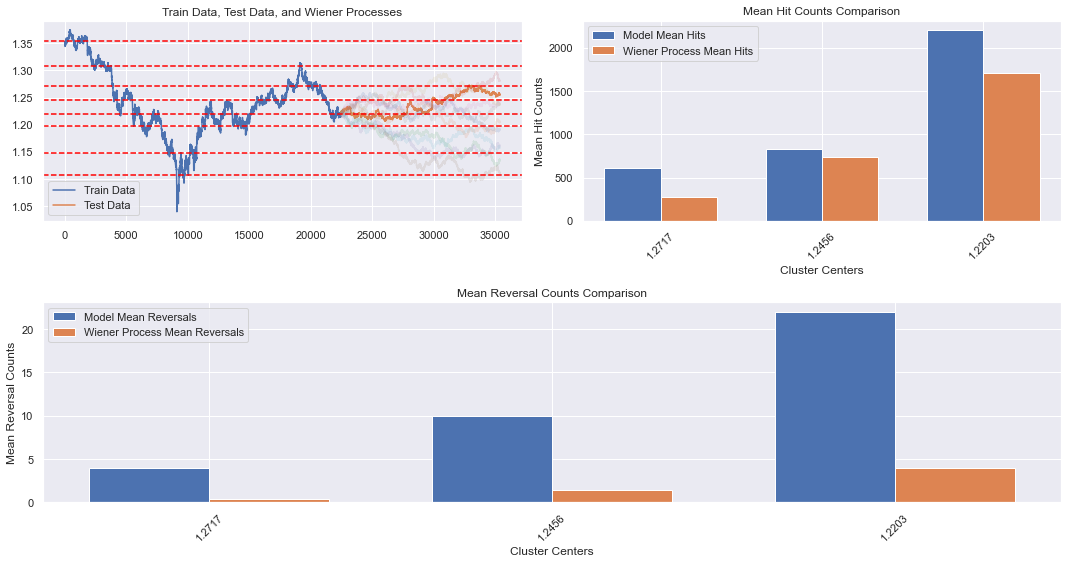

In [24]:
data_30m = pd.read_csv("FX_GBPUSD, 30.csv")  
data_5m = pd.read_csv("FX_GBPUSD, 5.csv")
kmeans(data30m=data_30m, data5m=data_5m, clusters=8)

#### K-Means Clustering (USDCAD)

Model Hit Rate: 0.18249132279213268
Wiener Process Hit Rate: 0.0261473197069032
t-statistic: 1.8417376680192294
p-value: 0.13931741393905644


Model Reversal Rate: 0.0007713073659853452
Wiener Process Reversal Rate: 0.0
Reversal t-statistic: 10.0
Reversal p-value: 0.009852457023325692


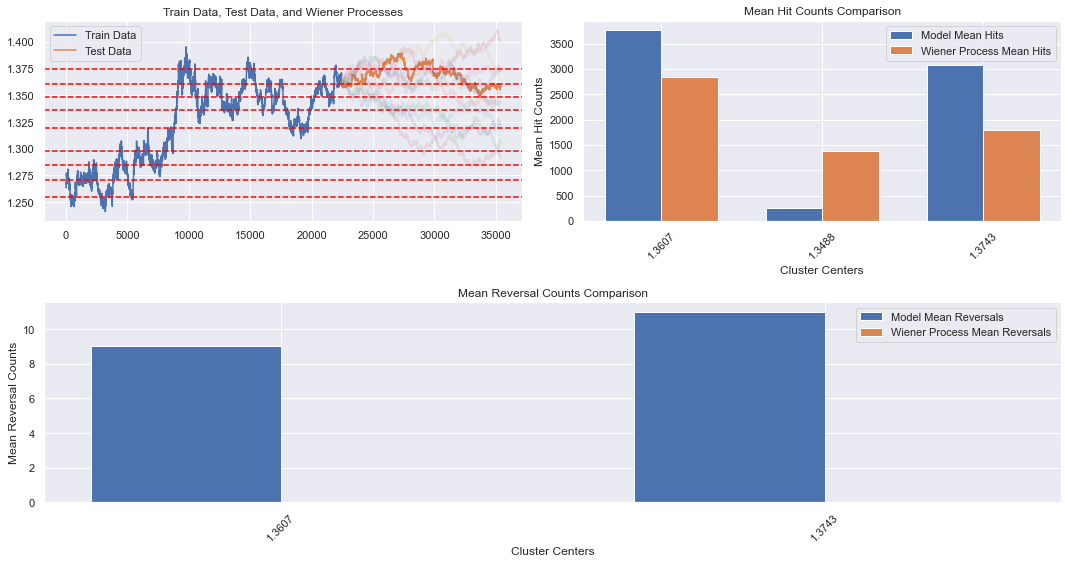

In [25]:
data_30m = pd.read_csv("FX_USDCAD, 30.csv")  
data_5m = pd.read_csv("FX_USDCAD, 5.csv")
kmeans(data30m=data_30m, data5m=data_5m, clusters=9)

#### K-Means Clustering (USDCHF)

Model Hit Rate: 0.07870798643231576
Wiener Process Hit Rate: 0.006681056634803166
t-statistic: 8.363587735397653
p-value: 0.0011175913903642744


Model Reversal Rate: 0.0007451947784972762
Wiener Process Reversal Rate: 0.0
Reversal t-statistic: 4.422458539645535
Reversal p-value: 0.011488963940327081


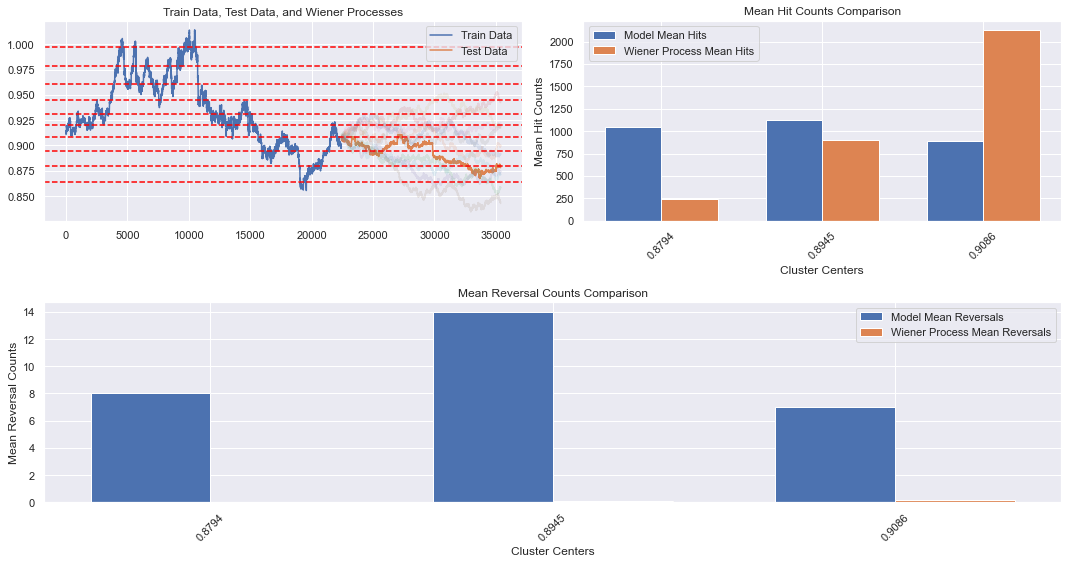

In [28]:
data_30m = pd.read_csv("FX_USDCHF, 30.csv")
data_5m = pd.read_csv("FX_USDCHF, 5.csv")

kmeans(data30m=data_30m, data5m=data_5m, clusters=10)

#### K-Means Clustering (AUDUSD)

Model Hit Rate: 0.07834039276087794
Wiener Process Hit Rate: 0.019002695417789758
t-statistic: 1.5799355206641306
p-value: 0.16520273058582793


Model Reversal Rate: 0.0025157232704402514
Wiener Process Reversal Rate: 2.567064561673726e-05
Reversal t-statistic: 5.52708795829244
Reversal p-value: 0.005234452562009529


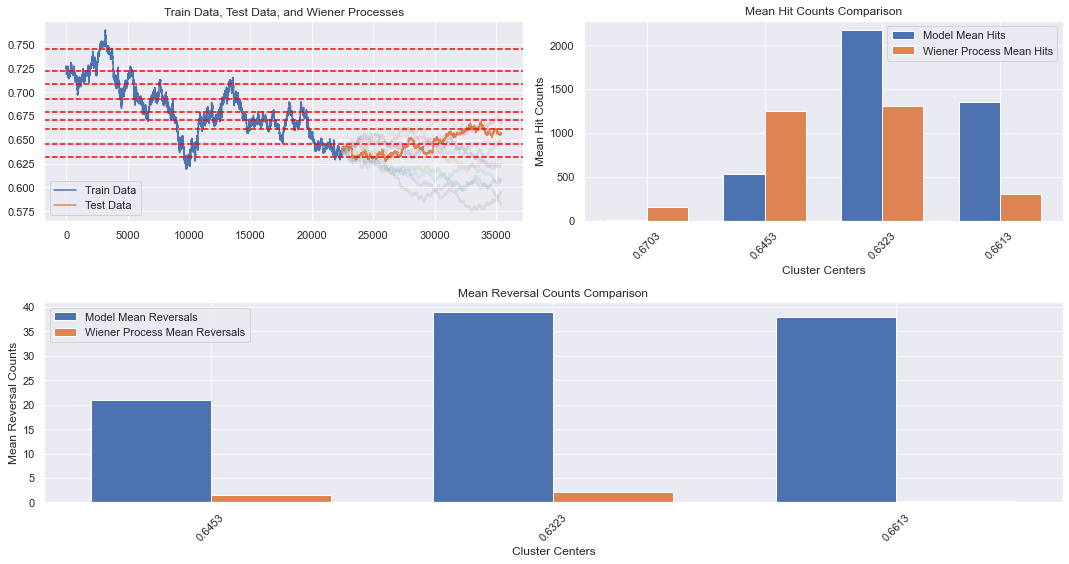

In [29]:
data_30m = pd.read_csv("FX_AUDUSD, 30.csv")
data_5m = pd.read_csv("FX_AUDUSD, 5.csv")

kmeans(data30m=data_30m, data5m=data_5m, clusters=9)

#### K-Means Clustering (NZDUSD)

Model Hit Rate: 0.054387721054387723
Wiener Process Hit Rate: 0.01830035163368497
t-statistic: 1.2706926244113066
p-value: 0.2727129625859295


Model Reversal Rate: 0.001232001232001232
Wiener Process Reversal Rate: 7.7000077000077e-05
Reversal t-statistic: 1.925822216299108
Reversal p-value: 0.12642151511074315


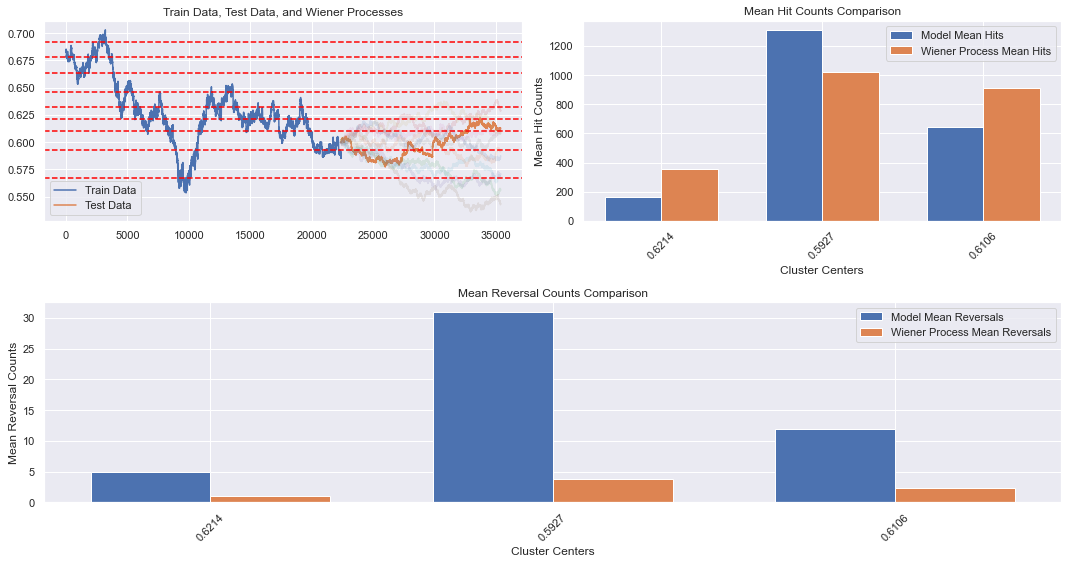

In [30]:
data_30m = pd.read_csv("FX_NZDUSD, 30.csv")
data_5m = pd.read_csv("FX_NZDUSD, 5.csv")

kmeans(data30m=data_30m, data5m=data_5m, clusters=9)

#### Gaussian Mixutre Model (EURUSD)

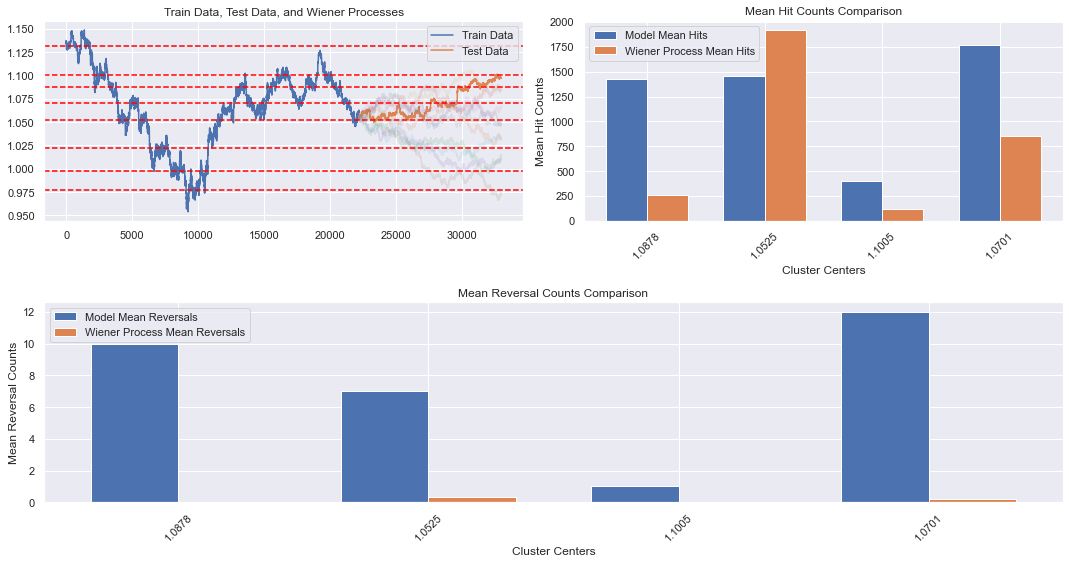

Model Hit Rate: 0.11708244458870444
Wiener Process Hit Rate: 0.05061207456181026
Hit Rate t-statistic: 1.97659296261641
Hit Rate p-value: 0.09547372299696058


Model Reversal Rate: 0.0006955392747843829
Wiener Process Reversal Rate: 0.0
Reversal Rate t-statistic: 3.127716210856122
Reversal Rate p-value: 0.02038374220321443


In [39]:
def gmm(data_30m, data_5m, clusters):    
    def calculate_reversals(prices, centers, look_forward=4, reversal_threshold=0.002):
        reversals = {center[0]: 0 for center in centers}
        for i in range(len(prices)):
            for center in centers:
                if abs(prices[i] - center[0]) / center[0] <= margin_of_error:
                    for j in range(i+1, min(i+1+look_forward, len(prices))):
                        if abs(prices[j] - prices[i]) / prices[i] >= reversal_threshold:
                            reversals[center[0]] += 1
                            break
        return reversals

    # Load 30-minute data and split
    prices_30m = data_30m['close'].values.reshape(-1, 1)
    train_prices, test_prices_30m = train_test_split(prices_30m, test_size=0.075, shuffle=False)
    test_prices = data_5m[data_5m['time'] >= 1696867200]['close'].values

    # Cluster with GMM on the training set
    gmm = GaussianMixture(n_components=clusters, random_state=10)
    gmm.fit(data_30m[data_30m['time'] < 1696867200][['close', 'open', 'high','low']].values)
    centers = gmm.means_

    # Define margin of error
    margin_of_error = 0.003  # ±0.3%

    # Calculate hits on the test set
    hits = {center[0]: 0 for center in centers}
    for price in test_prices:
        for center in centers:
            if abs(price - center[0]) / center[0] <= margin_of_error:
                hits[center[0]] += 1

    # Exclude cluster levels with zero hits in the test data
    non_zero_centers = [center for center in centers if hits[center[0]] > 0]
    non_zero_indices = [i for i, center in enumerate(centers) if hits[center[0]] > 0]

    # Simulation code
    num_simulations = 100
    total_hits_model, total_reversals_model = np.zeros(len(centers)), np.zeros(len(centers))
    total_hits_wiener, total_reversals_wiener = np.zeros(len(centers)), np.zeros(len(centers))

    for seed in range(num_simulations):
        np.random.seed(seed)

        # Re-simulate Wiener process
        wiener_process = np.empty_like(test_prices)
        wiener_process[0] = test_prices[0]
        for i in range(1, len(test_prices)):
            wiener_process[i] = wiener_process[i - 1] + np.random.normal(0, np.std(train_prices) / np.sqrt(len(train_prices)))

        # Calculate hits and reversals for actual data
        hits = {center[0]: 0 for center in centers}
        actual_reversals = calculate_reversals(test_prices, centers)
        for price in test_prices:
            for center in centers:
                if abs(price - center[0]) / center[0] <= margin_of_error:
                    hits[center[0]] += 1

        # Calculate hits and reversals for Wiener process
        wiener_hits = {center[0]: 0 for center in centers}
        wiener_reversals = calculate_reversals(wiener_process, centers)
        for price in wiener_process:
            for center in centers:
                if abs(price - center[0]) / center[0] <= margin_of_error:
                    wiener_hits[center[0]] += 1

        # Accumulate hits and reversals
        for i, center in enumerate(centers):
            total_hits_model[i] += hits[center[0]]
            total_reversals_model[i] += actual_reversals[center[0]]
            total_hits_wiener[i] += wiener_hits[center[0]]
            total_reversals_wiener[i] += wiener_reversals[center[0]]

    # Calculate mean hit and reversal rates for non-zero centers
    mean_hits_model = (total_hits_model / num_simulations)[non_zero_indices]
    mean_reversals_model = (total_reversals_model / num_simulations)[non_zero_indices]
    mean_hits_wiener = (total_hits_wiener / num_simulations)[non_zero_indices]
    mean_reversals_wiener = (total_reversals_wiener / num_simulations)[non_zero_indices]

    # Plotting
    plt.figure(figsize=(15, 8))

    # Plot train data, test data, and Wiener processes
    plt.subplot(2, 2, 1)
    plt.plot(range(len(train_prices)), train_prices, label='Train Data')
    plt.plot(range(len(train_prices), len(train_prices) + len(test_prices)), test_prices, label='Test Data')
    for seed in range(10):
        np.random.seed(seed)
        wiener_temp = np.empty_like(test_prices)
        wiener_temp[0] = test_prices[0]
        for i in range(1, len(test_prices)):
            wiener_temp[i] = wiener_temp[i - 1] + np.random.normal(0, np.std(train_prices) / np.sqrt(len(train_prices)))
        plt.plot(range(len(train_prices), len(train_prices) + len(wiener_temp)), wiener_temp, alpha=0.15)
    for level in centers:
        plt.axhline(y=level[0], color='red', linestyle='--')
    plt.title('Train Data, Test Data, and Wiener Processes')
    plt.legend()

    # Plot for mean hit counts comparison (excluding zero values)
    plt.subplot(2, 2, 2)
    width = 0.35
    indices = np.arange(len(non_zero_centers))
    plt.bar(indices - width/2, mean_hits_model, width, label='Model Mean Hits')
    plt.bar(indices + width/2, mean_hits_wiener, width, label='Wiener Process Mean Hits')
    plt.xlabel('Cluster Centers')
    plt.ylabel('Mean Hit Counts')
    plt.title('Mean Hit Counts Comparison')
    plt.xticks(indices, [f'{center[0]:.4f}' for center in non_zero_centers], rotation=45)
    plt.legend()

    # Plot for mean reversal counts comparison (excluding zero values)
    plt.subplot(2, 1, 2)
    plt.bar(indices - width/2, mean_reversals_model, width, label='Model Mean Reversals')
    plt.bar(indices + width/2, mean_reversals_wiener, width, label='Wiener Process Mean Reversals')
    plt.xlabel('Cluster Centers')
    plt.ylabel('Mean Reversal Counts')
    plt.title('Mean Reversal Counts Comparison')
    plt.xticks(indices, [f'{center[0]:.4f}' for center in non_zero_centers], rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Statistical comparison for hitrate (non-zero centers)
    non_zero_hits_model = np.array([hits[center[0]] for center in non_zero_centers])
    non_zero_wiener_hits = np.array([wiener_hits[center[0]] for center in non_zero_centers])
    t_stat_hits, p_value_hits = stats.ttest_ind(non_zero_hits_model, non_zero_wiener_hits)
    model_hit_rate = np.sum(non_zero_hits_model) / (len(test_prices) * len(non_zero_centers))
    wiener_hit_rate = np.sum(non_zero_wiener_hits) / (len(wiener_process) * len(non_zero_centers))
    print("Model Hit Rate:", model_hit_rate)
    print("Wiener Process Hit Rate:", wiener_hit_rate)
    print("Hit Rate t-statistic:", t_stat_hits)
    print("Hit Rate p-value:", p_value_hits)

    # Statistical comparison for reversals (non-zero centers)
    non_zero_actual_reversals = np.array([actual_reversals[center[0]] for center in non_zero_centers])
    non_zero_wiener_reversals = np.array([wiener_reversals[center[0]] for center in non_zero_centers])
    t_stat_reversals, p_value_reversals = stats.ttest_ind(non_zero_actual_reversals, non_zero_wiener_reversals)
    model_reversal_rate = np.sum(non_zero_actual_reversals) / (len(test_prices) * len(non_zero_centers))
    wiener_reversal_rate = np.sum(non_zero_wiener_reversals) / (len(wiener_process) * len(non_zero_centers))
    print("\n\nModel Reversal Rate:", model_reversal_rate)
    print("Wiener Process Reversal Rate:", wiener_reversal_rate)
    print("Reversal Rate t-statistic:", t_stat_reversals)
    print("Reversal Rate p-value:", p_value_reversals)
    
    
data30m = pd.read_csv("FX_EURUSD30.csv")
data5m = pd.read_csv("FX_EURUSD5.csv")
gmm(data_30m=data30m, data_5m=data5m, clusters=8)



#### Gaussian Mixture Model (GBPUSD)

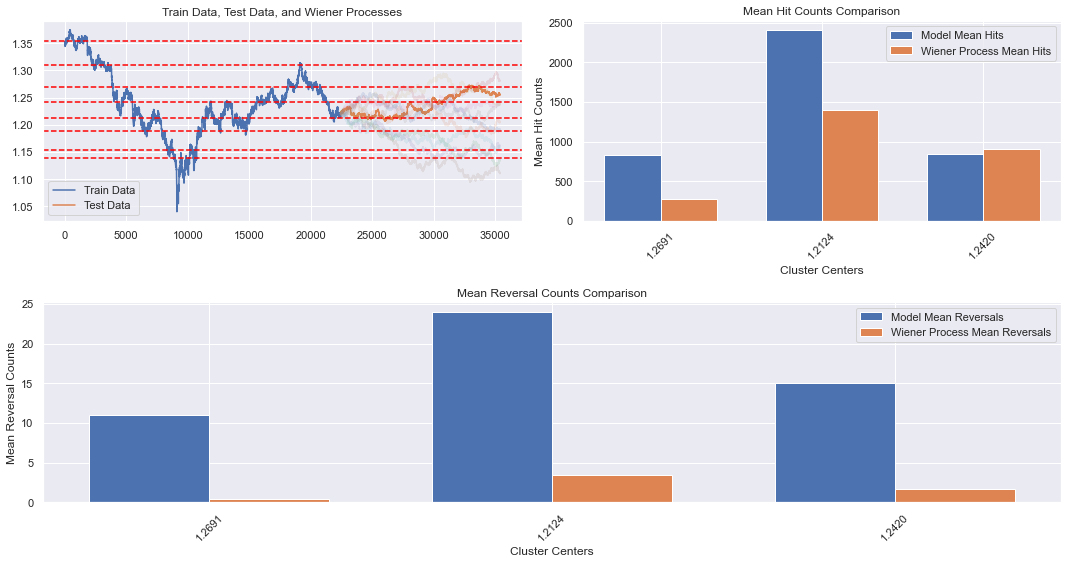

Model Hit Rate: 0.10505206324720401
Wiener Process Hit Rate: 0.020593906671808715
Hit Rate t-statistic: 1.9823169203805786
Hit Rate p-value: 0.11848709347313624


Model Reversal Rate: 0.001285512276642242
Wiener Process Reversal Rate: 0.0
Reversal Rate t-statistic: 4.3355498476206
Reversal Rate p-value: 0.012295891680613432


In [40]:
data30m = pd.read_csv("FX_GBPUSD, 30.csv")
data5m = pd.read_csv("FX_GBPUSD, 5.csv")

gmm(data_30m=data30m, data_5m=data5m, clusters=8)

#### Gaussian Mixture Model (USDCAD)

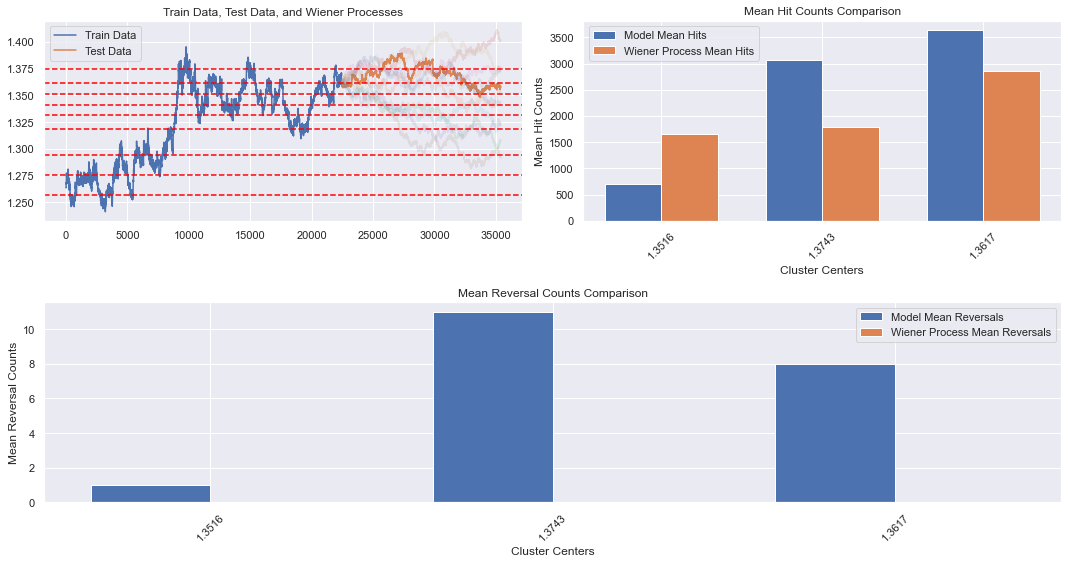

Model Hit Rate: 0.19079573209924156
Wiener Process Hit Rate: 0.028486952050392082
Hit Rate t-statistic: 2.270136713993093
Hit Rate p-value: 0.0857146982034675


Model Reversal Rate: 0.0005142049106568968
Wiener Process Reversal Rate: 0.0
Reversal Rate t-statistic: 2.250175801852048
Reversal Rate p-value: 0.08762811303744138


In [41]:
data30m = pd.read_csv("FX_USDCAD, 30.csv")
data5m = pd.read_csv("FX_USDCAD, 5.csv")

gmm(data_30m=data30m, data_5m=data5m, clusters=9)

#### Gaussian Mixture Model (USDCHF)

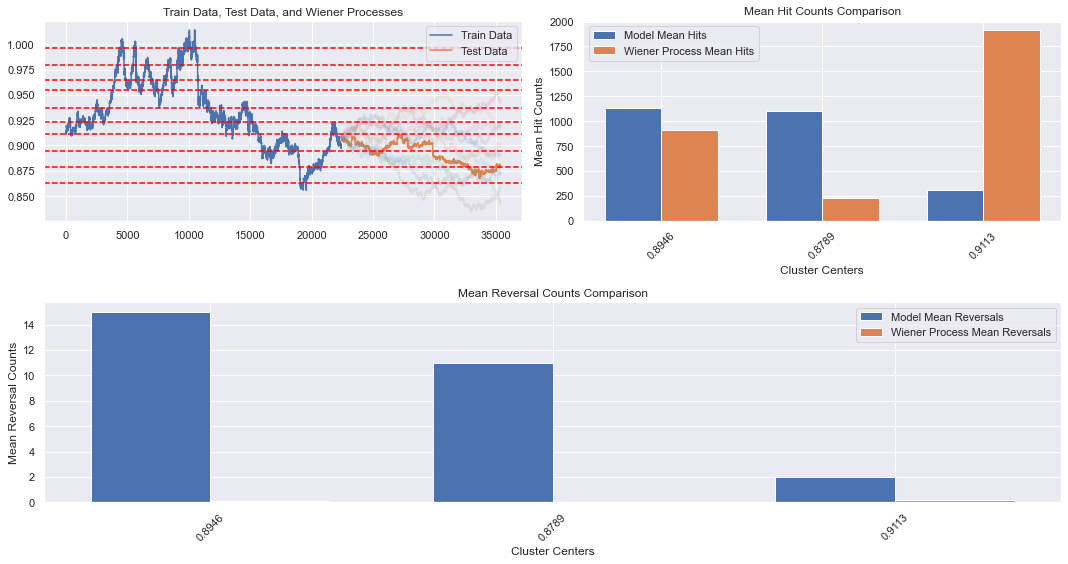

Model Hit Rate: 0.06514030218933087
Wiener Process Hit Rate: 0.013285024154589372
Hit Rate t-statistic: 2.1019898224112548
Hit Rate p-value: 0.10342074708930248


Model Reversal Rate: 0.0007194984068249563
Wiener Process Reversal Rate: 0.0
Reversal Rate t-statistic: 2.427907914667536
Reversal Rate p-value: 0.07214379464213344


In [42]:
data30m = pd.read_csv("FX_USDCHF, 30.csv")
data5m = pd.read_csv("FX_USDCHF, 5.csv")

gmm(data_30m=data30m, data_5m=data5m, clusters=10)

#### Gaussian Mixture Model (AUDUSD)

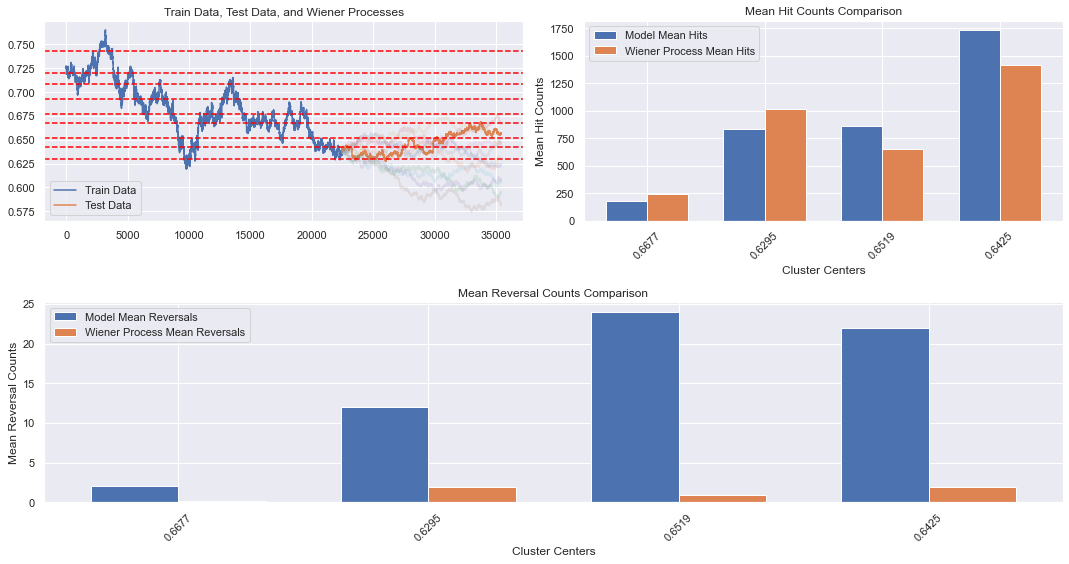

Model Hit Rate: 0.06944551405467847
Wiener Process Hit Rate: 0.03698498267231421
Hit Rate t-statistic: 1.1106878429254177
Hit Rate p-value: 0.3092196329212951


Model Reversal Rate: 0.0011551790527531767
Wiener Process Reversal Rate: 3.850596842510589e-05
Reversal Rate t-statistic: 2.85745490667645
Reversal Rate p-value: 0.028897878210870285


In [43]:
data30m = pd.read_csv("FX_AUDUSD, 30.csv")
data5m = pd.read_csv("FX_AUDUSD, 5.csv")

gmm(data_30m=data30m, data_5m=data5m, clusters=9)

#### Gaussian Mixture Model (NZDUSD)

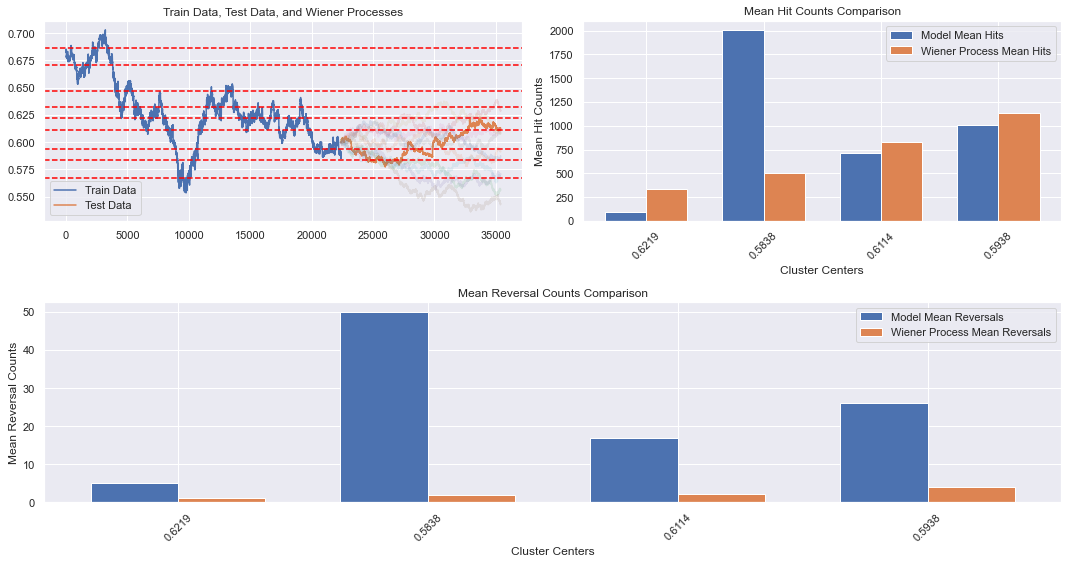

Model Hit Rate: 0.07341957341957342
Wiener Process Hit Rate: 0.017151767151767153
Hit Rate t-statistic: 1.6848669055951742
Hit Rate p-value: 0.14299513537131334


Model Reversal Rate: 0.0018865018865018865
Wiener Process Reversal Rate: 5.775005775005775e-05
Reversal Rate t-statistic: 2.4899615265980777
Reversal Rate p-value: 0.04716468218969525


In [44]:
data30m = pd.read_csv("FX_NZDUSD, 30.csv")
data5m = pd.read_csv("FX_NZDUSD, 5.csv")

gmm(data_30m=data30m, data_5m=data5m, clusters=9)

#### Ward Heirarchical Clustering (EURUSD)

Model Hit Rate: 0.13836594639710656
Wiener Process Hit Rate: 0.06447649077251229
t-statistic: 1.1989612094053568
p-value: 0.2757419048177141


Model Reversal Rate: 0.0011360474821478252
Wiener Process Reversal Rate: 0.0
Reversal t-statistic: 2.1412561082683896
Reversal p-value: 0.07601840939539745


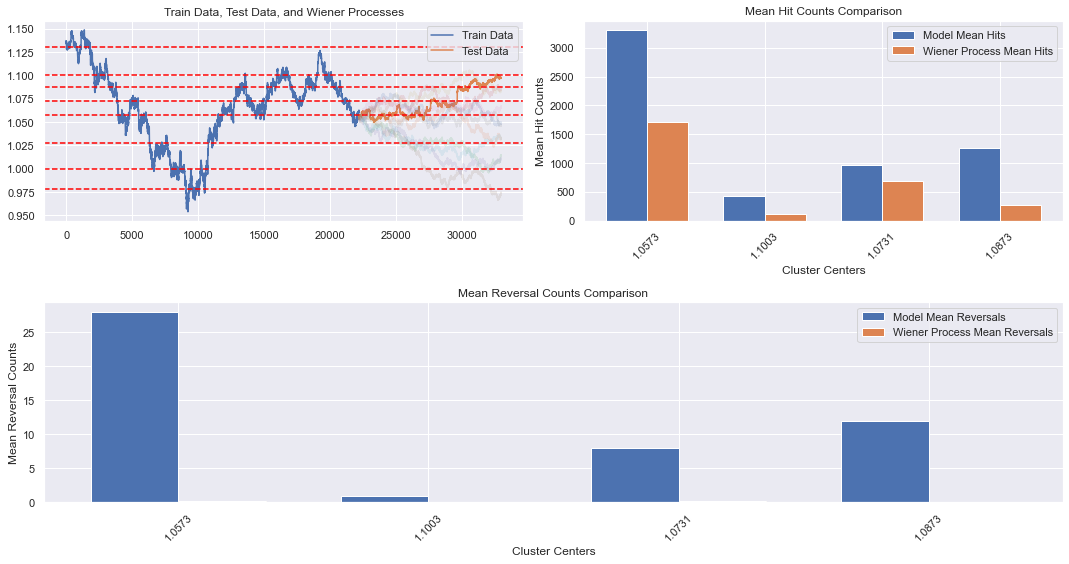

In [46]:
def ward(data_30m, data_5m, clusters):
    def calculate_reversals(prices, centers, look_forward=4, reversal_threshold=0.002):
        reversals = {center: 0 for center in centers}
        for i in range(len(prices)):
            for center in centers:
                if abs(prices[i] - center) / center <= margin_of_error:
                    for j in range(i+1, min(i+1+look_forward, len(prices))):
                        if abs(prices[j] - prices[i]) / prices[i] >= reversal_threshold:
                            reversals[center] += 1
                            break
        return reversals

    # Load 30-minute data and split
    prices = data_30m['close'].values.reshape(-1, 1)
    train_prices, test_prices_30m = train_test_split(prices, test_size=0.075, shuffle=False)
    test_prices = data_5m[data_5m['time'] >= 1696867200]['close'].values

    # Applying Ward's hierarchical clustering
    ward = AgglomerativeClustering(n_clusters=clusters, linkage='ward')
    labels = ward.fit_predict(data_30m[data_30m['time'] < 1696867200][['close', 'open', 'high','low']].values)

    # Calculate the mean price for each cluster
    centers = [prices[data_30m['time'] < 1696867200][labels == i].mean() for i in range(ward.n_clusters)]

    # Define margin of error
    margin_of_error = 0.003  # ±0.3%

    # Calculate hits on the test set
    hits = {center: 0 for center in centers}
    for price in test_prices:
        for center in centers:
            if abs(price - center) / center <= margin_of_error:
                hits[center] += 1

    num_simulations = 100
    total_hits_model, total_reversals_model = np.zeros(len(centers)), np.zeros(len(centers))
    total_hits_wiener, total_reversals_wiener = np.zeros(len(centers)), np.zeros(len(centers))

    for seed in range(num_simulations):
        np.random.seed(seed)

        # Re-simulate Wiener process
        wiener_process = np.empty_like(test_prices)
        wiener_process[0] = test_prices[0]
        for i in range(1, len(test_prices)):
            wiener_process[i] = wiener_process[i - 1] + np.random.normal(0, np.std(train_prices) / np.sqrt(len(train_prices)))

        # Calculate hits and reversals for actual data
        hits = {center: 0 for center in centers}
        actual_reversals = calculate_reversals(test_prices, centers)
        for price in test_prices:
            for center in centers:
                if abs(price - center) / center <= margin_of_error:
                    hits[center] += 1

        # Calculate hits and reversals for Wiener process
        wiener_hits = {center: 0 for center in centers}
        wiener_reversals = calculate_reversals(wiener_process, centers)
        for price in wiener_process:
            for center in centers:
                if abs(price - center) / center <= margin_of_error:
                    wiener_hits[center] += 1

        # Accumulate hits and reversals
        for i, center in enumerate(centers):
            total_hits_model[i] += hits[center]
            total_reversals_model[i] += actual_reversals[center]
            total_hits_wiener[i] += wiener_hits[center]
            total_reversals_wiener[i] += wiener_reversals[center]

    # Calculate mean hit and reversal rates, excluding levels with zero hits or reversals
    mean_hits_model = total_hits_model / num_simulations
    mean_reversals_model = total_reversals_model / num_simulations
    mean_hits_wiener = total_hits_wiener / num_simulations
    mean_reversals_wiener = total_reversals_wiener / num_simulations

    # Exclude levels with zero total hits or total reversals from mean values
    non_zero_indices_hits = np.where(mean_hits_model != 0)[0]
    non_zero_indices_reversals = np.where(mean_reversals_model != 0)[0]

    # Extract non-zero centers
    non_zero_centers_hits = [centers[i] for i in non_zero_indices_hits]
    non_zero_centers_reversals = [centers[i] for i in non_zero_indices_reversals]

    # Plotting with mean hit and reversal rates (excluding zero values)
    plt.figure(figsize=(15, 8))

    # Plot train data, test data, and the first 10 Wiener processes
    plt.subplot(2, 2, 1)
    plt.plot(range(len(train_prices)), train_prices, label='Train Data')
    plt.plot(range(len(train_prices), len(train_prices) + len(test_prices)), test_prices, label='Test Data')
    for seed in range(10):
        np.random.seed(seed)
        wiener_temp = np.empty_like(test_prices)
        wiener_temp[0] = test_prices[0]
        for i in range(1, len(test_prices)):
            wiener_temp[i] = wiener_temp[i - 1] + np.random.normal(0, np.std(train_prices) / np.sqrt(len(train_prices)))
        plt.plot(range(len(train_prices), len(train_prices) + len(wiener_temp)), wiener_temp, alpha=0.15)
    for level in centers:
        plt.axhline(y=level, color='red', linestyle='--')
    plt.title('Train Data, Test Data, and Wiener Processes')
    plt.legend()

    # Plot for mean hit counts comparison (excluding zero values)
    plt.subplot(2, 2, 2)
    width = 0.35
    indices_hits = np.arange(len(non_zero_centers_hits))
    plt.bar(indices_hits - width/2, mean_hits_model[non_zero_indices_hits], width, label='Model Mean Hits')
    plt.bar(indices_hits + width/2, mean_hits_wiener[non_zero_indices_hits], width, label='Wiener Process Mean Hits')
    plt.xlabel('Cluster Centers')
    plt.ylabel('Mean Hit Counts')
    plt.title('Mean Hit Counts Comparison')
    plt.xticks(indices_hits, [f'{center:.4f}' for center in non_zero_centers_hits], rotation=45)
    plt.legend()

    # Plot for mean reversal counts comparison (excluding zero values)
    plt.subplot(2, 1, 2)
    indices_reversals = np.arange(len(non_zero_centers_reversals))
    plt.bar(indices_reversals - width/2, mean_reversals_model[non_zero_indices_reversals], width, label='Model Mean Reversals')
    plt.bar(indices_reversals + width/2, mean_reversals_wiener[non_zero_indices_reversals], width, label='Wiener Process Mean Reversals')
    plt.xlabel('Cluster Centers')
    plt.ylabel('Mean Reversal Counts')
    plt.title('Mean Reversal Counts Comparison')
    plt.xticks(indices_reversals, [f'{center:.4f}' for center in non_zero_centers_reversals], rotation=45)
    plt.legend()

    # Statistical comparison for hit rate (excluding zero values)
    non_zero_hits_model = np.array(list(hits.values()))[non_zero_indices_hits]
    non_zero_wiener_hits = np.array(list(wiener_hits.values()))[non_zero_indices_hits]
    t_stat, p_value = stats.ttest_ind(non_zero_hits_model, non_zero_wiener_hits)
    print("Model Hit Rate:", sum(non_zero_hits_model) / (len(test_prices) * len(non_zero_centers_hits)))
    print("Wiener Process Hit Rate:", sum(non_zero_wiener_hits) / (len(wiener_process) * len(non_zero_centers_hits)))
    print("t-statistic:", t_stat)
    print("p-value:", p_value)

    # Statistical comparison for reversal rate (excluding zero values)
    non_zero_actual_reversals = np.array(list(actual_reversals.values()))[non_zero_indices_reversals]
    non_zero_wiener_reversals = np.array(list(wiener_reversals.values()))[non_zero_indices_reversals]
    t_stat_reversals, p_value_reversals = stats.ttest_ind(non_zero_actual_reversals, non_zero_wiener_reversals)
    print("\n\nModel Reversal Rate:", sum(non_zero_actual_reversals) / (len(test_prices) * len(non_zero_centers_reversals)))
    print("Wiener Process Reversal Rate:", sum(non_zero_wiener_reversals) / (len(wiener_process) * len(non_zero_centers_reversals)))
    print("Reversal t-statistic:", t_stat_reversals)
    print("Reversal p-value:", p_value_reversals)

    plt.tight_layout()
    plt.show()
    
    
data30m = pd.read_csv("FX_EURUSD30.csv")
data5m = pd.read_csv("FX_EURUSD5.csv")

ward(data_30m=data30m, data_5m=data5m, clusters=8)


#### Ward Heirarchical Clustering (GBPUSD)

Model Hit Rate: 0.07162874405450573
Wiener Process Hit Rate: 0.04213909242833269
t-statistic: 0.6823347221740521
p-value: 0.5324930220037822


Model Reversal Rate: 0.0010026995757809487
Wiener Process Reversal Rate: 0.0001928268414963363
Reversal t-statistic: 4.2
Reversal p-value: 0.05228326694629916


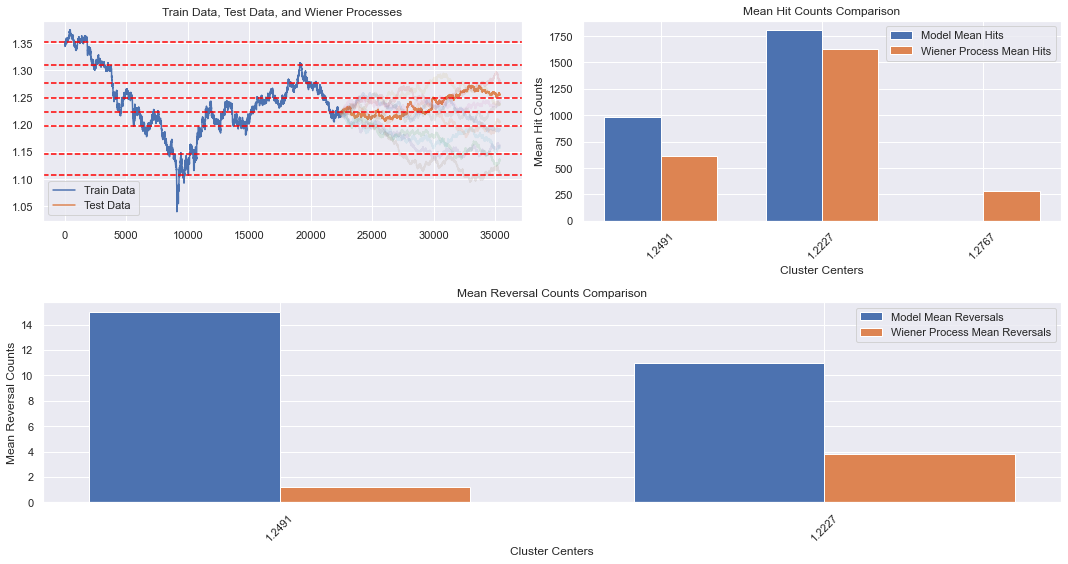

In [47]:
data30m = pd.read_csv("FX_GBPUSD, 30.csv")
data5m = pd.read_csv("FX_GBPUSD, 5.csv")

ward(data_30m=data30m, data_5m=data5m, clusters=8)

#### Ward Heirarchical Clustering (USDCAD)

Model Hit Rate: 0.1710502635300167
Wiener Process Hit Rate: 0.024039079573209925
t-statistic: 1.7491920742689162
p-value: 0.15516256490777552


Model Reversal Rate: 0.0008484381025838797
Wiener Process Reversal Rate: 0.0
Reversal t-statistic: 11.0
Reversal p-value: 0.00816340186582448


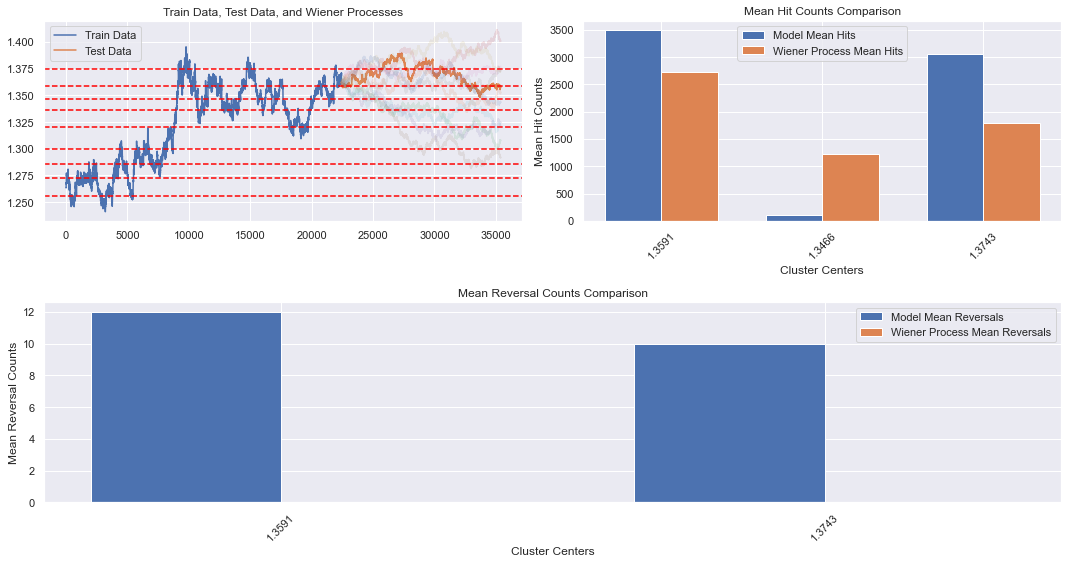

In [48]:
data30m = pd.read_csv("FX_USDCAD, 30.csv")
data5m = pd.read_csv("FX_USDCAD, 5.csv")

ward(data_30m=data30m, data_5m=data5m, clusters=9)

#### Ward Heirarchical Clustering (UDSCHF)

Model Hit Rate: 0.11536386062288005
Wiener Process Hit Rate: 0.0
t-statistic: 3.4284077892325313
p-value: 0.075560956841026


Model Reversal Rate: 0.0008865248226950354
Wiener Process Reversal Rate: 0.0
Reversal t-statistic: 4.6
Reversal p-value: 0.0441526198381099


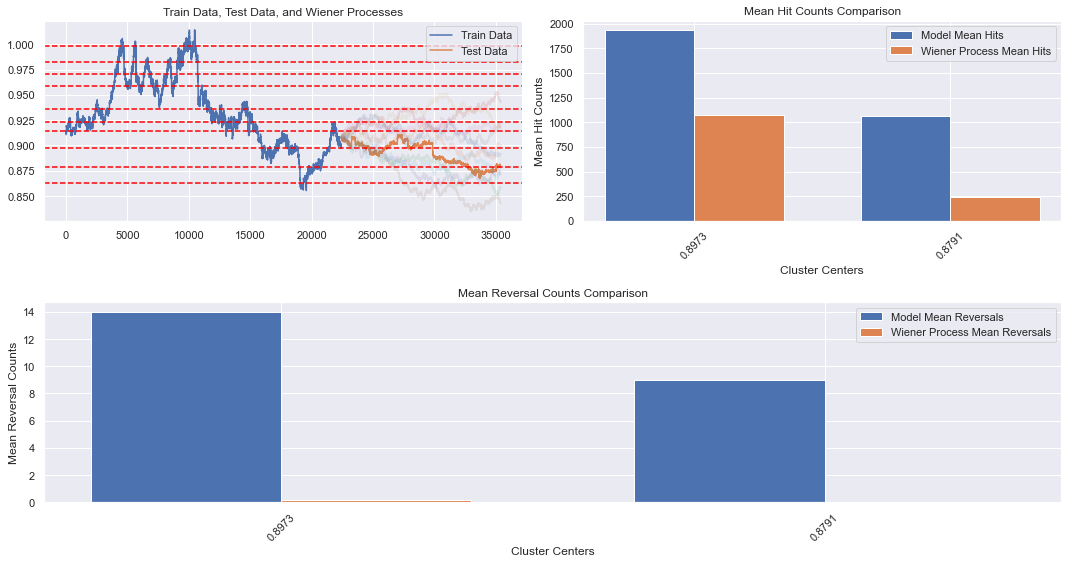

In [49]:
data30m = pd.read_csv("FX_USDCHF, 30.csv")
data5m = pd.read_csv("FX_USDCHF, 5.csv")

ward(data_30m=data30m, data_5m=data5m, clusters=10)

#### Ward Heirarchical Clustering (AUDUSD)

Model Hit Rate: 0.08009241432422025
Wiener Process Hit Rate: 0.02022846874598896
t-statistic: 1.3141645030546873
p-value: 0.25908525298323665


Model Reversal Rate: 0.00187395713002182
Wiener Process Reversal Rate: 2.567064561673726e-05
Reversal t-statistic: 2.44243271358993
Reversal p-value: 0.07102190946967044


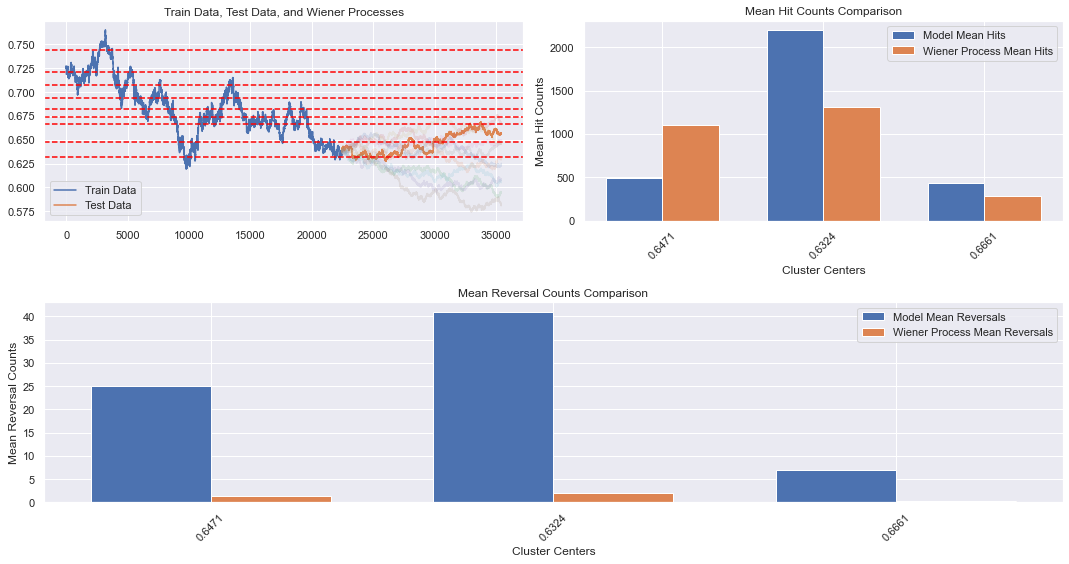

In [50]:
data30m = pd.read_csv("FX_AUDUSD, 30.csv")
data5m = pd.read_csv("FX_AUDUSD, 5.csv")

ward(data_30m=data30m, data_5m=data5m, clusters=9)

#### Ward Heirarchical Clustering (NZDUSD)

Model Hit Rate: 0.08974358974358974
Wiener Process Hit Rate: 0.033995533995534
t-statistic: 1.4248918219989697
p-value: 0.2902387146751153


Model Reversal Rate: 0.002618002618002618
Wiener Process Reversal Rate: 0.0
Reversal t-statistic: 8.5
Reversal p-value: 0.013559949584378913


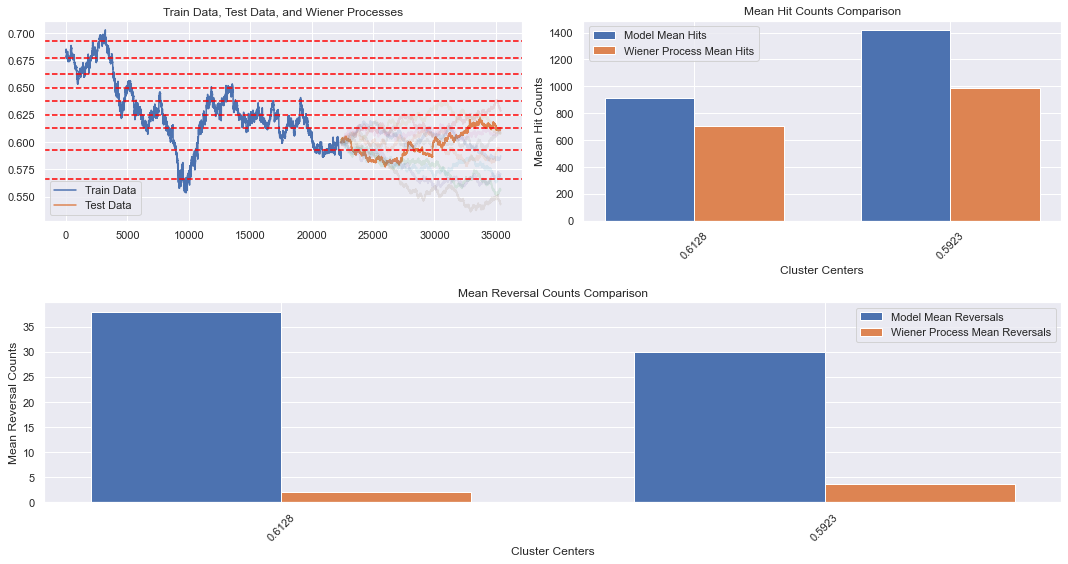

In [51]:
data30m = pd.read_csv("FX_NZDUSD, 30.csv")
data5m = pd.read_csv("FX_NZDUSD, 5.csv")

ward(data_30m=data30m, data_5m=data5m, clusters=9)

#### Nearest Neighbour Clustering (EURUSD)

Model Hit Rate: 0.15536801755850257
Wiener Process Hit Rate: 0.04330891217657424
t-statistic: 3.996925612292519
p-value: 0.016171400619311396


Model Reversal Rate: 0.0009582985563695941
Wiener Process Reversal Rate: 0.0
Reversal t-statistic: 11.716898663286045
Reversal p-value: 0.0003034589340070526


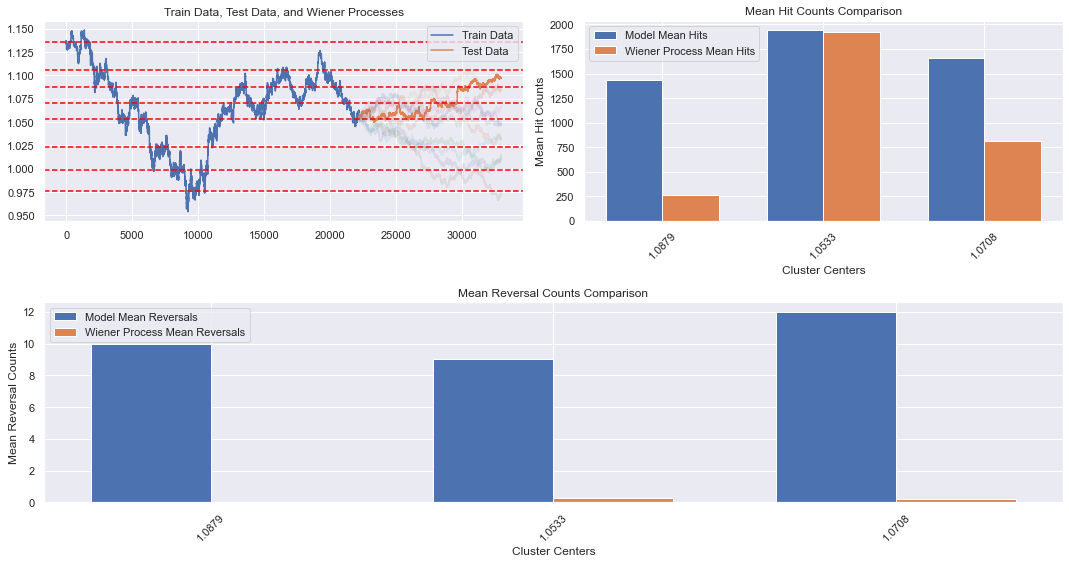

In [53]:
def nearest(data_30m, data_5m, clusters):  
    def calculate_reversals(prices, centers, look_forward=4, reversal_threshold=0.002):
        reversals = {center: 0 for center in centers}
        for i in range(len(prices)):
            for center in centers:
                if abs(prices[i] - center) / center <= margin_of_error:
                    for j in range(i+1, min(i+1+look_forward, len(prices))):
                        if abs(prices[j] - prices[i]) / prices[i] >= reversal_threshold:
                            reversals[center] += 1
                            break
        return reversals

    # Load 30-minute data and split
    prices = data_30m['close'].values.reshape(-1, 1)
    train_prices, test_prices_30m = train_test_split(prices, test_size=0.075, shuffle=False)
    test_prices = data_5m[data_5m['time'] >= 1696867200]['close'].values

    # Applying Spectral Clustering
    spectral = SpectralClustering(n_clusters=clusters, affinity='nearest_neighbors', random_state=0)
    labels = spectral.fit_predict(data_30m[data_30m['time'] < 1696867200][['close', 'open', 'high', 'low']].values)

    # Calculate the mean price for each cluster
    centers = [prices[data_30m['time'] < 1696867200][labels == i].mean() for i in range(spectral.n_clusters)]

    # Define margin of error
    margin_of_error = 0.003  # ±0.3%

    # Calculate hits on the test set
    hits = {center: 0 for center in centers}
    for price in test_prices:
        for center in centers:
            if abs(price - center) / center <= margin_of_error:
                hits[center] += 1

    num_simulations = 100
    total_hits_model, total_reversals_model = np.zeros(len(centers)), np.zeros(len(centers))
    total_hits_wiener, total_reversals_wiener = np.zeros(len(centers)), np.zeros(len(centers))

    for seed in range(num_simulations):
        np.random.seed(seed)

        # Re-simulate Wiener process
        wiener_process = np.empty_like(test_prices)
        wiener_process[0] = test_prices[0]
        for i in range(1, len(test_prices)):
            wiener_process[i] = wiener_process[i - 1] + np.random.normal(0, np.std(train_prices) / np.sqrt(len(train_prices)))

        # Calculate hits and reversals for actual data
        hits = {center: 0 for center in centers}
        actual_reversals = calculate_reversals(test_prices, centers)
        for price in test_prices:
            for center in centers:
                if abs(price - center) / center <= margin_of_error:
                    hits[center] += 1

        # Calculate hits and reversals for Wiener process
        wiener_hits = {center: 0 for center in centers}
        wiener_reversals = calculate_reversals(wiener_process, centers)
        for price in wiener_process:
            for center in centers:
                if abs(price - center) / center <= margin_of_error:
                    wiener_hits[center] += 1

        # Accumulate hits and reversals
        for i, center in enumerate(centers):
            total_hits_model[i] += hits[center]
            total_reversals_model[i] += actual_reversals[center]
            total_hits_wiener[i] += wiener_hits[center]
            total_reversals_wiener[i] += wiener_reversals[center]

    # Calculate mean hit and reversal rates, excluding levels with zero hits or reversals
    mean_hits_model = total_hits_model / num_simulations
    mean_reversals_model = total_reversals_model / num_simulations
    mean_hits_wiener = total_hits_wiener / num_simulations
    mean_reversals_wiener = total_reversals_wiener / num_simulations

    # Exclude levels with zero total hits or total reversals from mean values
    non_zero_indices_hits = np.where(mean_hits_model != 0)[0]
    non_zero_indices_reversals = np.where(mean_reversals_model != 0)[0]

    # Extract non-zero centers
    non_zero_centers_hits = [centers[i] for i in non_zero_indices_hits]
    non_zero_centers_reversals = [centers[i] for i in non_zero_indices_reversals]

    # Plotting with mean hit and reversal rates (excluding zero values)
    plt.figure(figsize=(15, 8))

    # Plot train data, test data, and the first 10 Wiener processes
    plt.subplot(2, 2, 1)
    plt.plot(range(len(train_prices)), train_prices, label='Train Data')
    plt.plot(range(len(train_prices), len(train_prices) + len(test_prices)), test_prices, label='Test Data')
    for seed in range(10):
        np.random.seed(seed)
        wiener_temp = np.empty_like(test_prices)
        wiener_temp[0] = test_prices[0]
        for i in range(1, len(test_prices)):
            wiener_temp[i] = wiener_temp[i - 1] + np.random.normal(0, np.std(train_prices) / np.sqrt(len(train_prices)))
        plt.plot(range(len(train_prices), len(train_prices) + len(wiener_temp)), wiener_temp, alpha=0.15)
    for level in centers:
        plt.axhline(y=level, color='red', linestyle='--')
    plt.title('Train Data, Test Data, and Wiener Processes')
    plt.legend()

    # Plot for mean hit counts comparison (excluding zero values)
    plt.subplot(2, 2, 2)
    width = 0.35
    indices_hits = np.arange(len(non_zero_centers_hits))
    plt.bar(indices_hits - width/2, mean_hits_model[non_zero_indices_hits], width, label='Model Mean Hits')
    plt.bar(indices_hits + width/2, mean_hits_wiener[non_zero_indices_hits], width, label='Wiener Process Mean Hits')
    plt.xlabel('Cluster Centers')
    plt.ylabel('Mean Hit Counts')
    plt.title('Mean Hit Counts Comparison')
    plt.xticks(indices_hits, [f'{center:.4f}' for center in non_zero_centers_hits], rotation=45)
    plt.legend()

    # Plot for mean reversal counts comparison (excluding zero values)
    plt.subplot(2, 1, 2)
    indices_reversals = np.arange(len(non_zero_centers_reversals))
    plt.bar(indices_reversals - width/2, mean_reversals_model[non_zero_indices_reversals], width, label='Model Mean Reversals')
    plt.bar(indices_reversals + width/2, mean_reversals_wiener[non_zero_indices_reversals], width, label='Wiener Process Mean Reversals')
    plt.xlabel('Cluster Centers')
    plt.ylabel('Mean Reversal Counts')
    plt.title('Mean Reversal Counts Comparison')
    plt.xticks(indices_reversals, [f'{center:.4f}' for center in non_zero_centers_reversals], rotation=45)
    plt.legend()

    # Statistical comparison for hit rate (excluding zero values)
    non_zero_hits_model = np.array(list(hits.values()))[non_zero_indices_hits]
    non_zero_wiener_hits = np.array(list(wiener_hits.values()))[non_zero_indices_hits]
    t_stat, p_value = stats.ttest_ind(non_zero_hits_model, non_zero_wiener_hits)
    print("Model Hit Rate:", sum(non_zero_hits_model) / (len(test_prices) * len(non_zero_centers_hits)))
    print("Wiener Process Hit Rate:", sum(non_zero_wiener_hits) / (len(wiener_process) * len(non_zero_centers_hits)))
    print("t-statistic:", t_stat)
    print("p-value:", p_value)

    # Statistical comparison for reversal rate (excluding zero values)
    non_zero_actual_reversals = np.array(list(actual_reversals.values()))[non_zero_indices_reversals]
    non_zero_wiener_reversals = np.array(list(wiener_reversals.values()))[non_zero_indices_reversals]
    t_stat_reversals, p_value_reversals = stats.ttest_ind(non_zero_actual_reversals, non_zero_wiener_reversals)
    print("\n\nModel Reversal Rate:", sum(non_zero_actual_reversals) / (len(test_prices) * len(non_zero_centers_reversals)))
    print("Wiener Process Reversal Rate:", sum(non_zero_wiener_reversals) / (len(wiener_process) * len(non_zero_centers_reversals)))
    print("Reversal t-statistic:", t_stat_reversals)
    print("Reversal p-value:", p_value_reversals)

    plt.tight_layout()
    plt.show()
    
data30m = pd.read_csv("FX_EURUSD30.csv")
data5m = pd.read_csv("FX_EURUSD5.csv")

nearest(data_30m=data30m, data_5m=data5m, clusters=8)


#### Nearest Neighbors (GBPUSD)

Model Hit Rate: 0.08520375369584779
Wiener Process Hit Rate: 0.042010541200668466
t-statistic: 0.9812821297112306
p-value: 0.38201240977249384


Model Reversal Rate: 0.001041264944080216
Wiener Process Reversal Rate: 0.00026995757809487083
Reversal t-statistic: 6.324555320336758
Reversal p-value: 0.024099927051466824


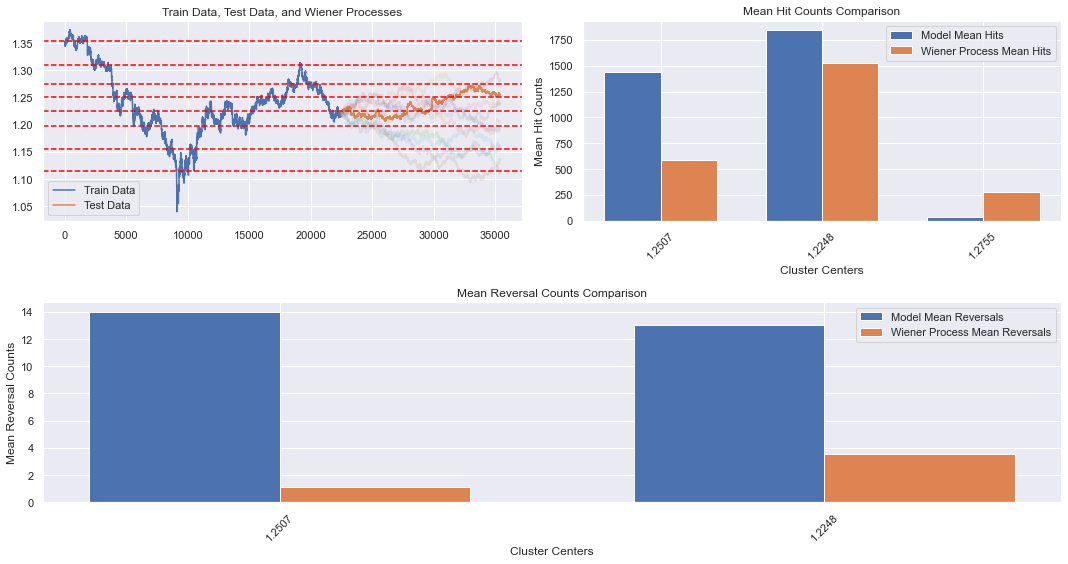

In [54]:
data30m = pd.read_csv("FX_GBPUSD, 30.csv")
data5m = pd.read_csv("FX_GBPUSD, 5.csv")

nearest(data_30m=data30m, data_5m=data5m, clusters=8)

#### Nearest Neighbors (USDCAD)

Model Hit Rate: 0.17639799460084843
Wiener Process Hit Rate: 0.025093199640056563
t-statistic: 1.7585328482600382
p-value: 0.15347941933502598


Model Reversal Rate: 0.000887003470883147
Wiener Process Reversal Rate: 0.0
Reversal t-statistic: 23.0
Reversal p-value: 0.0018850158136836835


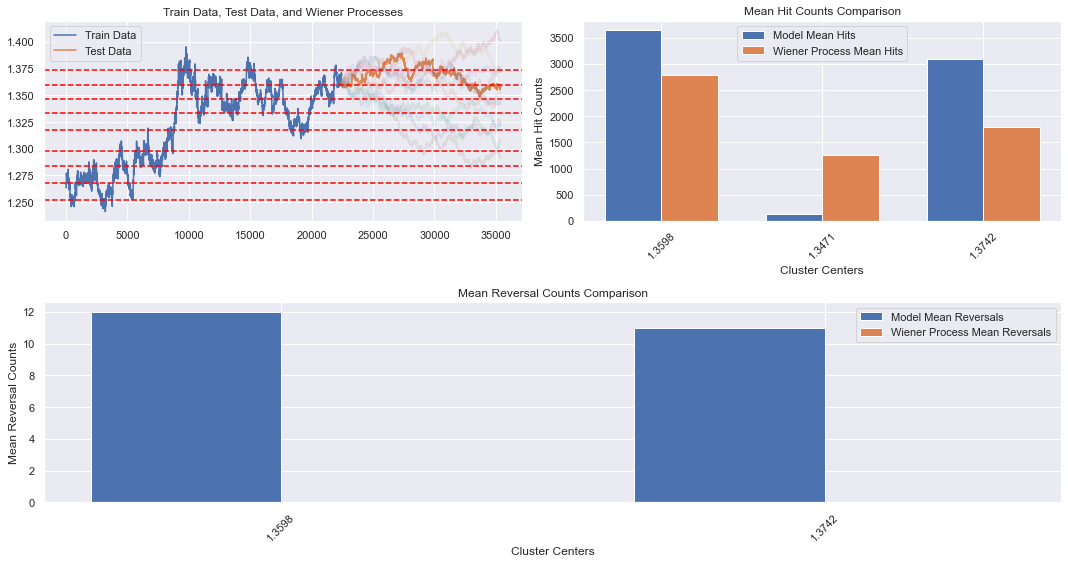

In [55]:
data30m = pd.read_csv("FX_USDCAD, 30.csv")
data5m = pd.read_csv("FX_USDCAD, 5.csv")

nearest(data_30m=data30m, data_5m=data5m, clusters=9)

#### Nearest Neighbors (USDCHF)

Model Hit Rate: 0.09710658854969678
Wiener Process Hit Rate: 0.0017216569020454312
t-statistic: 8.09928394247675
p-value: 0.0012631892929508652


Model Reversal Rate: 0.0008222838935142358
Wiener Process Reversal Rate: 0.0
Reversal t-statistic: 12.09486313629527
Reversal p-value: 0.0002680464900850274


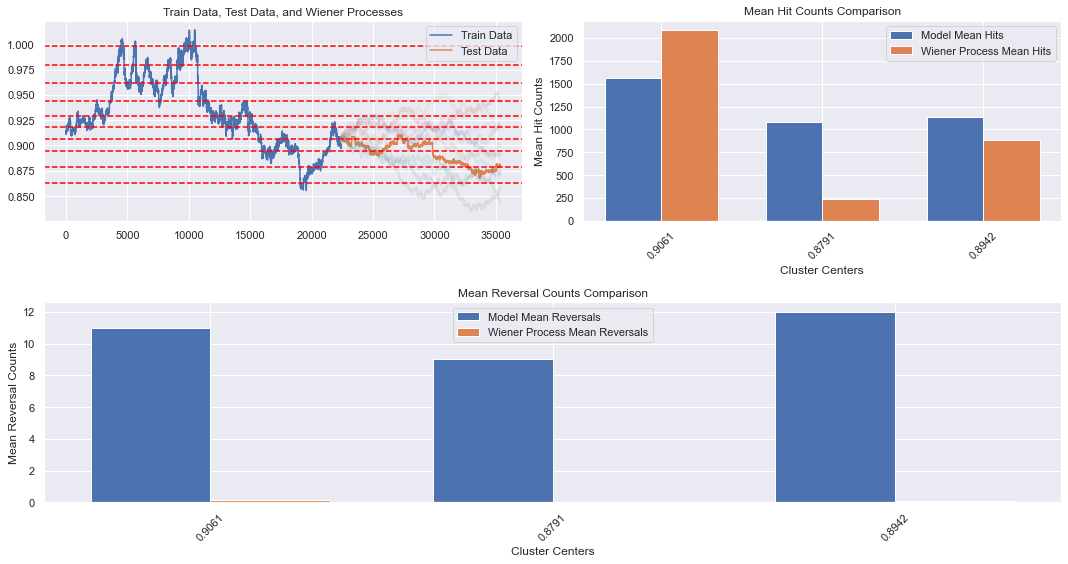

In [56]:
data30m = pd.read_csv("FX_USDCHF, 30.csv")
data5m = pd.read_csv("FX_USDCHF, 5.csv")

nearest(data_30m=data30m, data_5m=data5m, clusters=10)

#### Nearest Neighors (AUDUSD)

Model Hit Rate: 0.06063406494673341
Wiener Process Hit Rate: 0.016121165447311
t-statistic: 1.9229679171137857
p-value: 0.12683744434264677


Model Reversal Rate: 0.001283532280836863
Wiener Process Reversal Rate: 2.567064561673726e-05
Reversal t-statistic: 4.8756822320289475
Reversal p-value: 0.008186056095463442


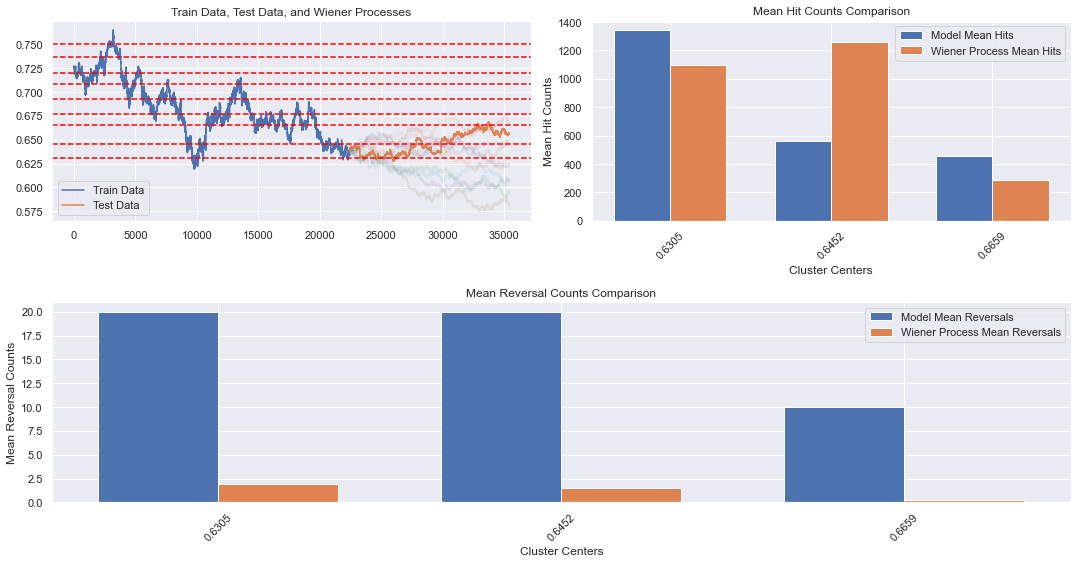

In [57]:
data30m = pd.read_csv("FX_AUDUSD, 30.csv")
data5m = pd.read_csv("FX_AUDUSD, 5.csv")

nearest(data_30m=data30m, data_5m=data5m, clusters=9)

#### Nearest Neighbors (NZDUSD)

Model Hit Rate: 0.05808372475039142
Wiener Process Hit Rate: 0.01411668078334745
t-statistic: 1.5675190556826615
p-value: 0.19206348915422178


Model Reversal Rate: 0.001180667847334514
Wiener Process Reversal Rate: 7.7000077000077e-05
Reversal t-statistic: 1.9249443684541347
Reversal p-value: 0.1265492774660748


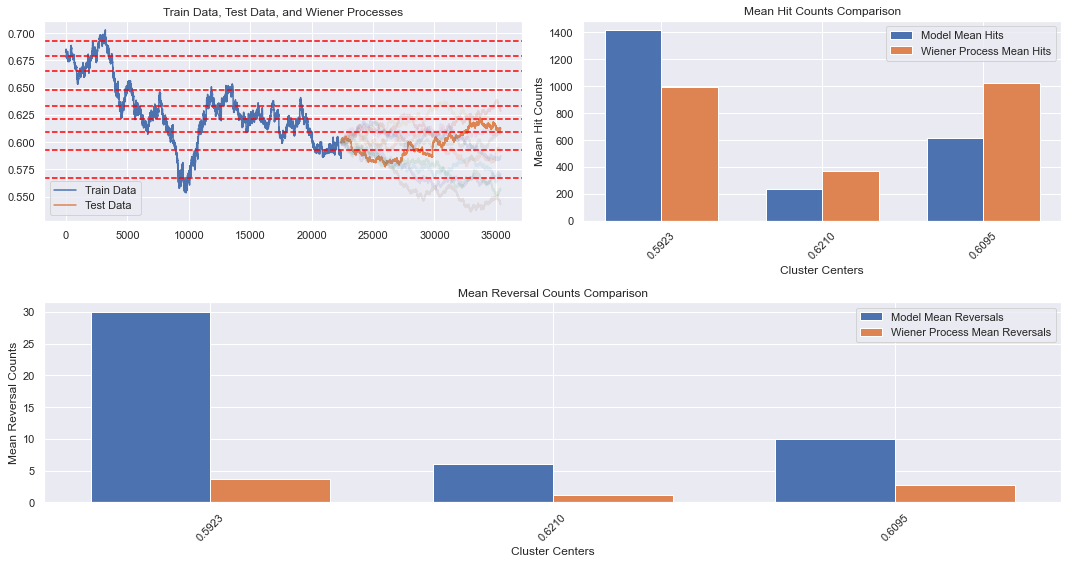

In [58]:
data30m = pd.read_csv("FX_NZDUSD, 30.csv")
data5m = pd.read_csv("FX_NZDUSD, 5.csv")

nearest(data_30m=data30m, data_5m=data5m, clusters=9)